<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Homework 2 Solution Key</div>
<div style="text-align: right">Prof. Dino Konstantopoulos, 17 January 2020</div>

# Machine Learning goes Wall Street
A story of broken dreams.


<br />
<center>
<img src="ipynb.images/wolf-wall-street.jpg" width=400 />
</center>

Let's warm up:

In [1]:
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
#pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2019, 1, 30)
aapl = web.DataReader('AAPL', 'yahoo', start, end)
aapl.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438
2016-01-11,99.059998,97.339996,98.970001,98.529999,49739400.0,92.073563
2016-01-12,100.690002,98.839996,100.550003,99.959999,49154200.0,93.409874
2016-01-13,101.190002,97.300003,100.320000,97.389999,62439600.0,91.008270
2016-01-14,100.480003,95.739998,97.959999,99.519997,63170100.0,92.998695


If you have an API key, you can access *more* information (please use my `quandl` API key *sparingly*, and please don't sell it!), for example on `quandl`:

In [2]:
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
#pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2019, 1, 1)
aapl = web.DataReader('AAPL', 'quandl', start, end, api_key='E8LGujxYzNsiUWYDPbGF')
aapl.head(10)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.15,166.9200,168.340,38962839.0,0.0,1.0,173.68,175.15,166.9200,168.340,38962839.0
2018-03-26,168.07,173.10,166.4400,172.770,36272617.0,0.0,1.0,168.07,173.10,166.4400,172.770,36272617.0
2018-03-23,168.39,169.92,164.9400,164.940,40248954.0,0.0,1.0,168.39,169.92,164.9400,164.940,40248954.0
2018-03-22,170.00,172.68,168.6000,168.845,41051076.0,0.0,1.0,170.00,172.68,168.6000,168.845,41051076.0
2018-03-21,175.04,175.09,171.2600,171.270,35247358.0,0.0,1.0,175.04,175.09,171.2600,171.270,35247358.0
2018-03-20,175.24,176.80,174.9400,175.240,19314039.0,0.0,1.0,175.24,176.80,174.9400,175.240,19314039.0
2018-03-19,177.32,177.47,173.6600,175.300,32804695.0,0.0,1.0,177.32,177.47,173.6600,175.300,32804695.0
2018-03-16,178.65,179.12,177.6200,178.020,36836456.0,0.0,1.0,178.65,179.12,177.6200,178.020,36836456.0
2018-03-15,178.50,180.24,178.0701,178.650,22584565.0,0.0,1.0,178.50,180.24,178.0701,178.650,22584565.0


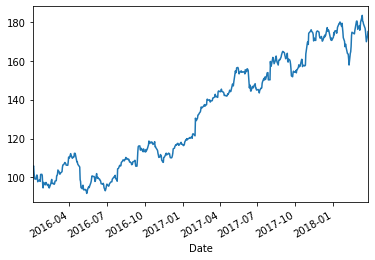

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
vol = aapl['High']
vol.plot()

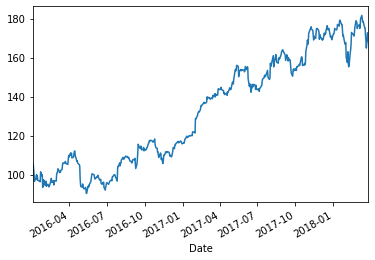

In [4]:
close = aapl['Close']
close.plot()

We can calculate the n-th (n=1 is the default) discrete difference along a given axis to find out about gains/losses, using numpy's [diff](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) API:

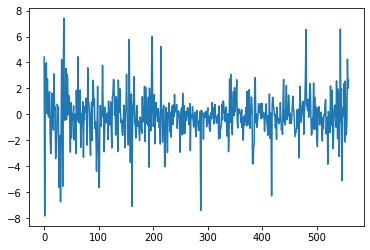

In [5]:
import numpy as np
returns = np.diff(close)
plt.plot(returns)

### Time Series Exploratory Data Analysis (EDA)

A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a **forecast** for the future.

However, there are other aspects that come into play when dealing with time series. Namely:
- Is it **stationary**? Stationarity is an important characteristic of time series. A time series is said to be
stationary if its statistical properties do not change over time. In other words, it has
constant mean and variance, and covariance is independent of time. We'll study what these concepts represent when we get into statistics. For now just think of them as point estimates of a distribution of numbers. Often, stock prices are ***not a stationary process***, since we might see a growing trend, or
its volatility might increase over time (meaning that variance is changing). Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can often make different transformations to make them stationary. [Dickey-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) is the statistical test
that we run to determine if a time series is stationary or not. If you Coop for Wall Street or get a job as quant, you'll be running this test *all the time*.


- Is the target variable **autocorrelated**? Autocorrelation is the similarity between observations as a function of the
time lag between them


- Is there a **seasonality**? Seasonality refers to periodic fluctuations. For example, electricity consumption is high
during the day and low during night, or online sales increase during Christmas before slowing down again. seasonality can also be derived from an autocorrelation plot if it has a
sinusoidal shape. Simply look at the period, and it gives the length of the season

First, we import libraries that will be helpful throughout our analysis. 

Then, we import a dataset.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('data/stock_prices_sample.csv', index_col=['DATE'], parse_dates=['DATE'])
data.head(10)

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2013-01-04,GEF,BBG000BLFQH8,EOD,daily,46.31,47.6198,46.2300,47.3700,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
2013-01-03,GEF,BBG000BLFQH8,EOD,daily,46.43,46.5200,46.1400,46.4800,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2013-01-02,GEF,BBG000BLFQH8,EOD,daily,45.38,46.5400,45.1600,46.4100,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
2018-06-05,GF,BBG000C3C6S2,Intraday,daily,18.86,18.9100,18.8700,18.8700,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.8900,18.7900,18.8100,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0
2018-06-01,GF,BBG000C3C6S2,EOD,daily,18.58,18.7600,18.5800,18.7400,17468.0,18.580000,18.760000,18.580000,18.740000,17468.0,NaN,0.0,1.0
2018-05-31,GF,BBG000C3C6S2,EOD,daily,18.52,18.5200,18.3012,18.4900,22384.0,18.520000,18.520000,18.301200,18.490000,22384.0,NaN,0.0,1.0
2018-05-30,GF,BBG000C3C6S2,EOD,daily,18.47,18.6780,18.4700,18.6500,22633.0,18.470000,18.678000,18.470000,18.650000,22633.0,NaN,0.0,1.0
2018-05-29,GF,BBG000C3C6S2,EOD,daily,18.51,18.5100,18.1500,18.2562,67412.0,18.510000,18.510000,18.150000,18.256200,67412.0,NaN,0.0,1.0


Assume we only want end of day (EOD) information, and no `GEF` or `Intraday` tickers.

So let's clean the data:

In [11]:
data = data[data.TICKER != 'GEF']
data = data[data.TYPE != 'Intraday']
drop_cols = ['SPLIT_RATIO', 'EX_DIVIDEND', 'ADJ_FACTOR', 'ADJ_VOLUME', 'ADJ_CLOSE', 'ADJ_LOW', 
             'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']

data.drop(drop_cols, axis=1, inplace=True)
data.head()

,TICKER,OPEN,HIGH,LOW,CLOSE
DATE,,,,,
2018-06-04,GF,18.86,18.890,18.7900,18.8100
2018-06-01,GF,18.58,18.760,18.5800,18.7400
2018-05-31,GF,18.52,18.520,18.3012,18.4900
2018-05-30,GF,18.47,18.678,18.4700,18.6500
2018-05-29,GF,18.51,18.510,18.1500,18.2562


Let's plot the closing price:

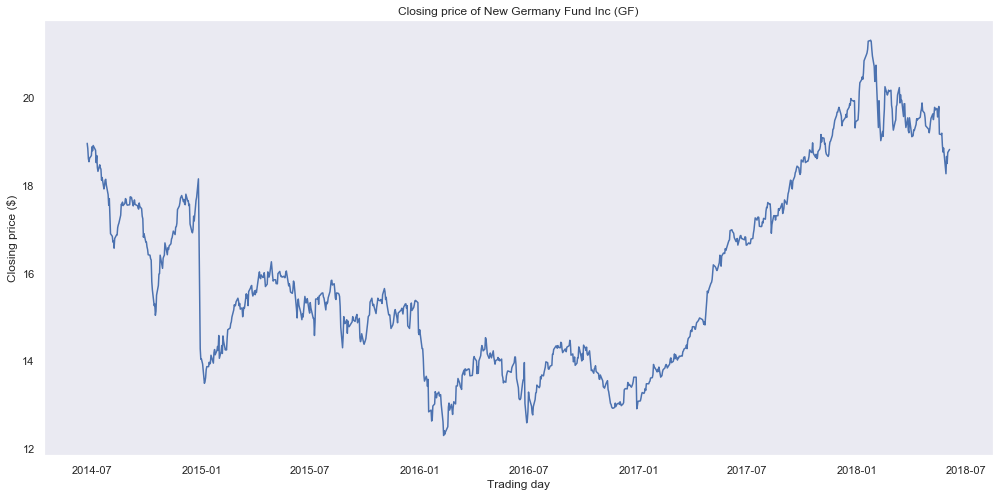

In [12]:
# Plot closing price

plt.figure(figsize=(17, 8))
plt.plot(data.CLOSE)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

Clearly, you see that this is not a stationary process (e.g. statistical *point* estimates such as the **mean** varies over time), and it is hard to tell if there is some kind of seasonality.

### Moving average
The moving average model is probably the most naive approach to time series
modelling. This model simply states that the next observation is the mean of all past
observations.

Although simple, this model might be surprisingly good and it represents a good starting
point. 

Otherwise, the moving average can be used to identify interesting trends in the data. We
can define a window to apply the moving average model to smooth the time series, and
highlight different trends.

Let’s use the moving average model to smooth our time series. For that, we will use a
helper function that will run the moving average model on a specified time window and
it will plot the result smoothed curve:

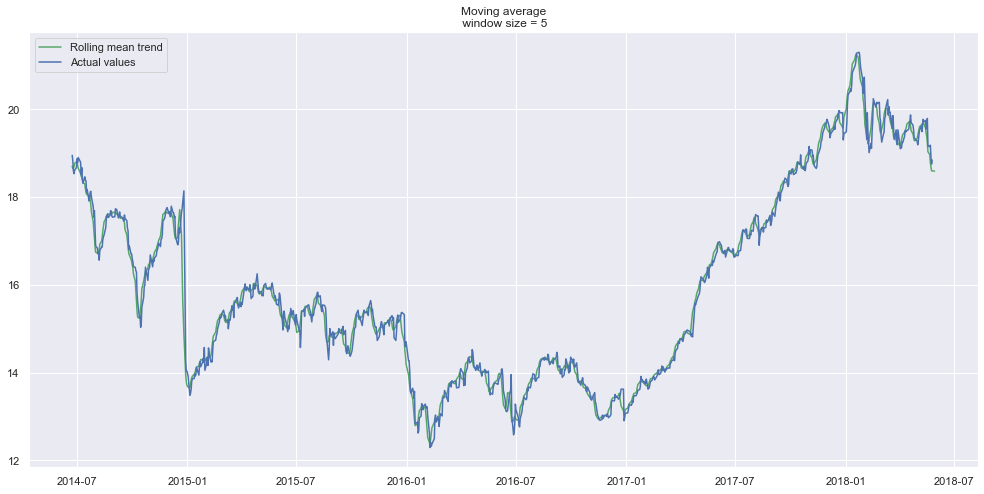

In [13]:
from sklearn.metrics import mean_absolute_error
#def mean_absolute_percentage_error(y_true, y_pred):
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(data.CLOSE, 5)

#Smooth by the previous month (30 days)
#plot_moving_average(data.CLOSE, 30)

#Smooth by previous quarter (90 days)
#plot_moving_average(data.CLOSE, 90, plot_intervals=True)

As you can see, we can hardly see a trend, because it is too close to actual curve. Let’s see
the result of smoothing by the previous month, and previous quarter:

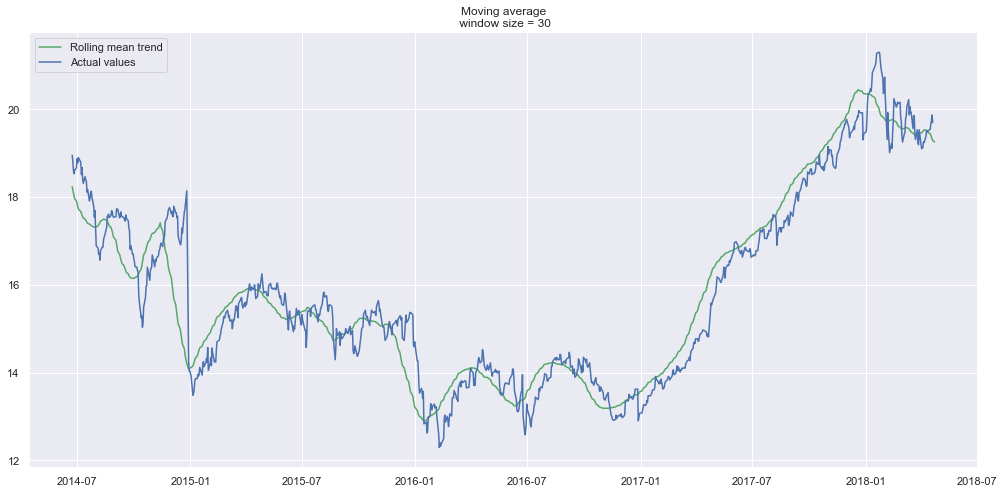

In [14]:
plot_moving_average(data.CLOSE, 30)

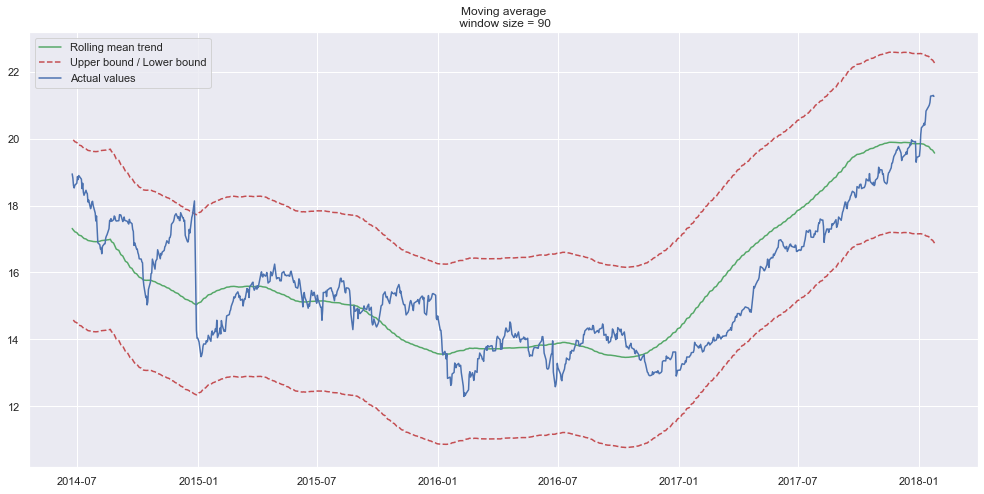

In [15]:
plot_moving_average(data.CLOSE, 90, plot_intervals=True)

Trends are easier to spot now. Notice how the 30-day and 90-day trend show a
downward curve at the end. This might mean that the stock is likely to go down in the
following days.

### Exponential smoothing
**Exponential smoothing** uses a similar logic to moving average, but this time, a different
decreasing weight is assigned to each observations. In other words, less importance is
given to observations as we move further from the present (very old observations become less important).

**Double exponential smoothing** is used when there is a trend in the time series. In that
case, we use this technique, which is simply a recursive use of exponential smoothing
twice.

**Triple exponential smoothing** extends double exponential smoothing, by adding a seasonal smoothing
factor. Of course, this is useful if you notice seasonality in your time series.

<br />
<center>
<img src="ipynb.images/exponential-smoothing.png" width=400 />
</center>

$\alpha$ is a smoothing factor that takes values between 0 and 1. It determines how
fast the weight decreases for previous observations.

$\beta$ is the trend smoothing factor, and it takes values between 0 and 1.

$\gamma$ is the seasonal smoothing factor and L is the length of the season.

Let's do exponential smoothing and use 0.05 and 0.3 as values for the smoothing factor.

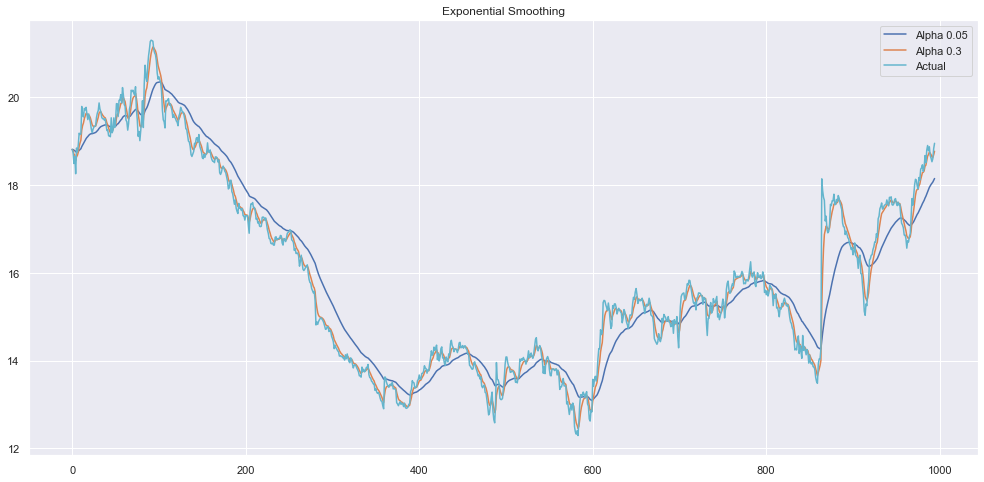

In [16]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(data.CLOSE, [0.05, 0.3])

As you can see, an alpha value of 0.05 smoothed the curve while picking up most of the
upward and downward trends.

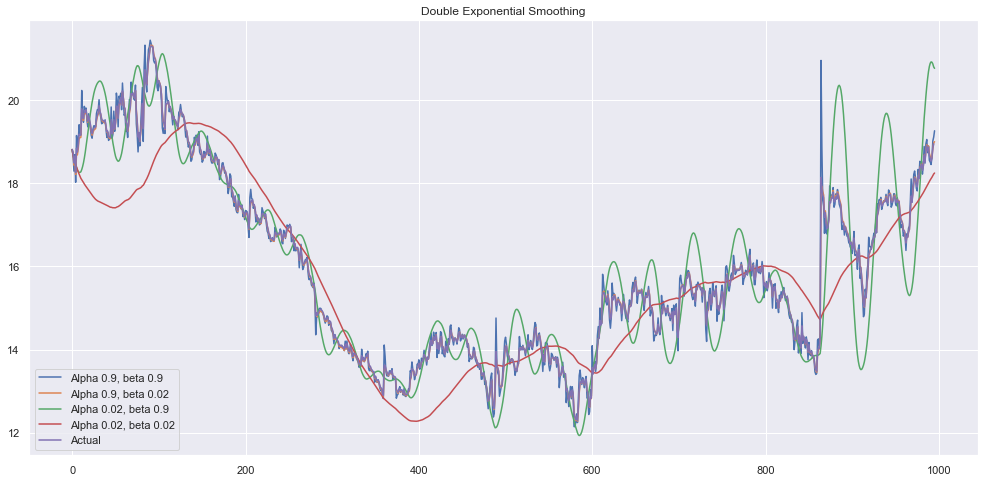

In [17]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(data.CLOSE, alphas=[0.9, 0.02], betas=[0.9, 0.02])

### Modelling

We must turn our series into a **stationary process** in order to
model it. Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process. The Dickey-Fuller test is a point estimate, when it is tiny (say less than 0.01), we can safely say that the time series is stationary. Otherwise, *not*.

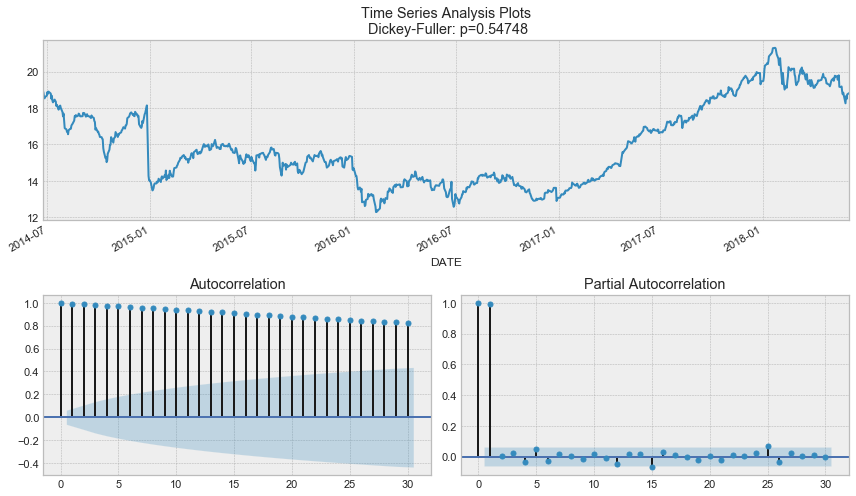

In [18]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        #smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        #smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.CLOSE, lags=30)

By the Dickey-Fuller test, the time series is non-stationary. 

Also, looking at the autocorrelation plot, we see that it is very high, and it seems that there is no clear seasonality.

Therefore, to get rid of the high autocorrelation and to make the process stationary, let’s take the first difference: We simply subtract the time series from itself with a lag of one day, and we get:

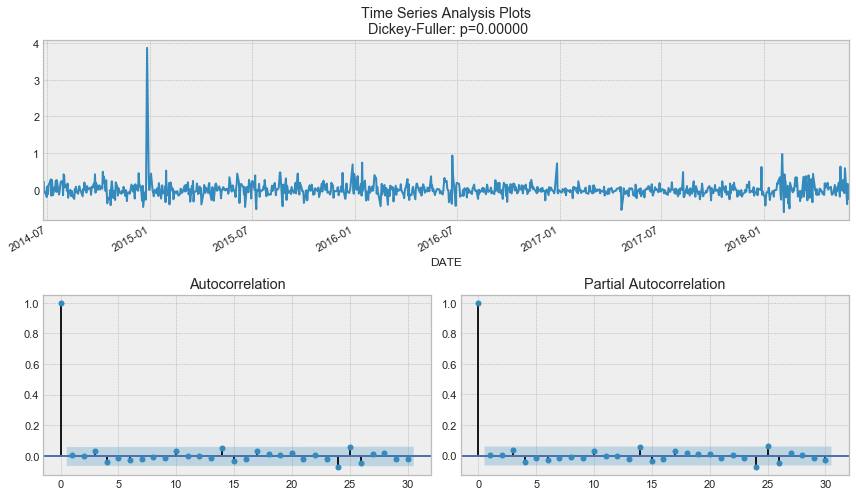

In [19]:
# Take the first difference to remove to make the process stationary
data_diff = data.CLOSE - data.CLOSE.shift(1)

tsplot(data_diff[1:], lags=30)

Our series is now stationary and we can start modelling! 

To that end, I googled for some financial pacakges. Here is what I found:

# Investpy

In [23]:
pip install investpy

     |████████████████████████████████| 4.4MB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 245kB 2.8MB/s eta 0:00:01
  Created wheel for investpy: filename=investpy-0.9.13-cp37-none-any.whl size=4455216 sha256=34c90f60585b8f9e9edf230f99cea755201bf8f49a7eb72743f4e2af7ee28764
  Stored in directory: /Users/CYH/Library/Caches/pip/wheels/82/96/a5/bd36e43ba90996cbd1eb81a5f1c80626c6fe64910641058904
Successfully built investpy
Note: you may need to restart the kernel to use updated packages.


The docs are [here](https://investpy.readthedocs.io/introduction.html).

In [24]:
import investpy as ip

df = ip.get_stock_recent_data(stock='AAPL', country='united states')
print(df.head())

              Open    High     Low   Close    Volume Currency
Date                                                         
2020-01-05  293.79  299.96  292.75  299.80  29644644      USD
2020-01-06  299.84  300.90  297.48  298.39  27877656      USD
2020-01-07  297.16  304.44  297.16  303.19  33090946      USD
2020-01-08  307.24  310.43  306.20  309.63  42621544      USD
2020-01-09  310.60  312.67  308.25  310.33  35217272      USD


In [25]:
help(ip.get_stock_recent_data)

Help on function get_stock_recent_data in module investpy.stocks:

get_stock_recent_data(stock, country, as_json=False, order='ascending', interval='Daily')
    This function retrieves recent historical data from the introduced stock from Investing.com. So on, the recent data
    of the introduced stock from the specified country will be retrieved and returned as a :obj:`pandas.DataFrame` if
    the parameters are valid and the request to Investing.com succeeds. Note that additionally some optional parameters
    can be specified: as_json and order, which let the user decide if the data is going to be returned as a
    :obj:`json` or not, and if the historical data is going to be ordered ascending or descending (where the index is the 
    date), respectively.
    
    Args:
        stock (:obj:`str`): symbol of the stock to retrieve recent historical data from.
        country (:obj:`str`): name of the country from where the stock is.
        as_json (:obj:`bool`, optional):
         

>Note: If you install another version of `investpy`, `get_stock_recent_data()` might be called `get_stock_recent_data()`.

In [26]:
dfaapl_h = ip.get_stock_historical_data(stock='AAPL', country='united states', 
                                        from_date='01/01/2018', to_date='01/01/2020',)
print(dfaapl_h.head())

              Open    High     Low   Close    Volume Currency
Date                                                         
2018-01-01  170.16  172.30  169.26  172.26  25555934      USD
2018-01-02  172.53  174.55  171.96  172.23  29517900      USD
2018-01-03  172.54  173.47  172.08  173.03  22434596      USD
2018-01-04  173.44  175.37  173.05  175.00  23660018      USD
2018-01-07  174.35  175.61  173.93  174.35  20567766      USD


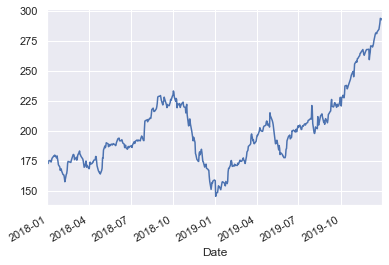

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
high = dfaapl_h['High']
high.plot()

Here's another package by the same author that advertizes it can identify **trends**. It had ***bugs***, so I cloned it and fixed the bugs so you can use it. Install this way from my github repo, using an anaconda terminal:

#pip install trendnet --user
python -m pip install https://github.com/dinorows/trendnet/archive/master.zip

Then use this way:

In [31]:
pip install trendet

     |████████████████████████████████| 1.2MB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 7.0MB/s eta 0:00:01
  Created wheel for trendet: filename=trendet-0.5-cp37-none-any.whl size=8738 sha256=100fad47e1932b1d10a83ea575d5a02061159220d129ab23e1e678ab659870e6
  Stored in directory: /Users/CYH/Library/Caches/pip/wheels/d3/6b/7c/b15eaa7e57bc4870d30c80e21761f243d79815d824925d0ba4
  Created wheel for investpy: filename=investpy-0.9.2-cp37-none-any.whl size=2454647 sha256=2582c958d5c6713ea81392c142ba7159b952ac5d33add0933976b7dd433422a8
  Stored in directory: /Users/CYH/Library/Caches/pip/wheels/26/c1/96/ae6661f2074a9cc5664d2343095fba890da180ac04c5c0e169
Successfully built trendet investpy
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3
  Found existing installation: investpy 0.9.13
    Uninstalling investpy-0.9.13:
      Successfully uninstalled investpy-0.9.13
Note: you may need to restart the 

In [32]:
import investpy
import trendet

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

df = trendet.identify_all_trends(equity='AAPL', 
                                 country='united states', 
                                 from_date='01/01/2018', 
                                 to_date='01/01/2020',
                                 window_size=5,
                                 identify='both')

df.reset_index(inplace=True)

plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=df.index, y=df['Close'])
ax.set(xlabel='Date')

labels = df['Up Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Up Trend'] == label].index,
                 y=df[df['Up Trend'] == label]['Close'],
                 color='green')

    ax.axvspan(df[df['Up Trend'] == label].index[0],
               df[df['Up Trend'] == label].index[-1],
               alpha=0.2,
               color='green')

labels = df['Down Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Down Trend'] == label].index,
                 y=df[df['Down Trend'] == label]['Close'],
                 color='red')

    ax.axvspan(df[df['Down Trend'] == label].index[0],
               df[df['Down Trend'] == label].index[-1],
               alpha=0.2,
               color='red')
               
locs, _ = plt.xticks()
labels = []

for position in locs[1:-1]:
    labels.append(str(df['Date'].loc[position])[:-9])

plt.xticks(locs[1:-1], labels)
plt.show()

ImportError: cannot import name 'get_historical_data' from 'investpy' (/Users/CYH/opt/anaconda3/envs/theano/lib/python3.7/site-packages/investpy/__init__.py)

Yup, `trendnet` is pretty good at detecting **down** (red) and **up** (green) trends in the stock (and disregarding hiccups in brown)!

# pynance
Here's another package. It too did not work, had to fix some source code. Specifically, following the two pip installs below:
```(python)
pip install pynance
pip install mplfinance
```

I had to do this mod (replace commented out line with line below it instead) in `pynance\chart.py`:
```(python)
#~dk
#import matplotlib.finance as fplt
import mplfinance as fplt
```
>Note: Yup, that's right, *you can modify the source code of the packages you download*!

>Note: For me, my anaconda packages install at `D:\Anaconda3.5.1\Lib\site-packages`. However, sometimes they install at `C:\Users\Dino\AppData\Roaming\Python\Python36\site-packages`. The force is ***strong*** on the Windows side...

>Note: `mplfinance` is `matplotlib`'s finance package! It completes stock `matplotlib` with financial tools.

pip install pynance
pip install mplfinance

In [29]:
import mplfinance as mplf
mplf. #click the TAB key to see the goodies!

SyntaxError: invalid syntax (<ipython-input-29-b8288ff24884>, line 2)

In [30]:
import pynance as pn
ge = pn.data.get('ge', '1980', '2015')
ge

ModuleNotFoundError: No module named 'pynance'

Ok, well, *enough* with googling python packages. Let me apply what I learned from class last week and apply it to a stock. It all sounded ***great*** to me..

# A *flawed* model

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data.drop('TICKER', axis=1, inplace=True)
data2 = data.reindex(index=data.index[::-1])
data2

,OPEN,HIGH,LOW,CLOSE
DATE,,,,
2014-06-23,19.05,19.0500,18.9500,18.9500
2014-06-24,18.91,18.9500,18.8300,18.8300
2014-06-25,18.66,18.7200,18.5900,18.6000
2014-06-26,18.52,18.5901,18.4200,18.5300
2014-06-27,18.63,18.6300,18.5100,18.6100
...,...,...,...,...
2018-05-29,18.51,18.5100,18.1500,18.2562
2018-05-30,18.47,18.6780,18.4700,18.6500
2018-05-31,18.52,18.5200,18.3012,18.4900


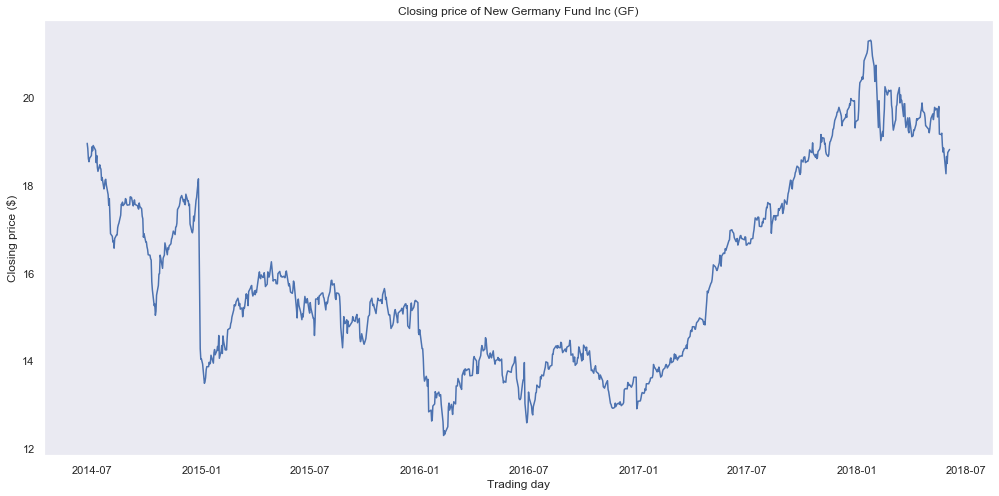

In [34]:
plt.figure(figsize=(17, 8))
plt.plot(data2.CLOSE)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)

What is the total time interval for the data above? How much time in the past should we earmark as training data, if we pick let's say 80% of it?

In [35]:
diff = data2.index.values[-1] - data2.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
and_days = days - years * 365
print('Total data over ' + str(years) + ' years and ' + str(and_days) + ' days')
print("80 percent data = 2014 to %d"%(2014 + int(0.8*years)))

Total data over 3 years and 347.0 days
80 percent data = 2014 to 2016


So let's split into training and test data:

In [36]:
data2[0:10]

,OPEN,HIGH,LOW,CLOSE
DATE,,,,
2014-06-23,19.05,19.0500,18.9500,18.9500
2014-06-24,18.91,18.9500,18.8300,18.8300
2014-06-25,18.66,18.7200,18.5900,18.6000
2014-06-26,18.52,18.5901,18.4200,18.5300
2014-06-27,18.63,18.6300,18.5100,18.6100
2014-06-30,18.68,18.8000,18.5700,18.6701
2014-07-01,18.68,18.9200,18.6800,18.8700
2014-07-02,18.74,18.8100,18.7201,18.7800
2014-07-03,18.86,18.9990,18.8600,18.9000


In [37]:
split_date = pd.Timestamp('10-01-2017')
train = data2.loc[:split_date]
train

,OPEN,HIGH,LOW,CLOSE
DATE,,,,
2014-06-23,19.05,19.0500,18.9500,18.9500
2014-06-24,18.91,18.9500,18.8300,18.8300
2014-06-25,18.66,18.7200,18.5900,18.6000
2014-06-26,18.52,18.5901,18.4200,18.5300
2014-06-27,18.63,18.6300,18.5100,18.6100
...,...,...,...,...
2017-09-25,18.39,18.4660,18.3900,18.3901
2017-09-26,18.36,18.3600,18.2900,18.2900
2017-09-27,18.25,18.2500,18.1601,18.2400


In [38]:
len(train)

826

In [39]:
test = data2[826:]
test

,OPEN,HIGH,LOW,CLOSE
DATE,,,,
2017-10-02,18.49,18.5832,18.4800,18.5241
2017-10-03,18.51,18.6200,18.5000,18.6200
2017-10-04,18.63,18.6737,18.6300,18.6400
2017-10-05,18.63,18.6701,18.6102,18.6400
2017-10-06,18.54,18.5900,18.4203,18.5100
...,...,...,...,...
2018-05-29,18.51,18.5100,18.1500,18.2562
2018-05-30,18.47,18.6780,18.4700,18.6500
2018-05-31,18.52,18.5200,18.3012,18.4900


In [40]:
len(test)

169

What we're going to train with (the *past*):

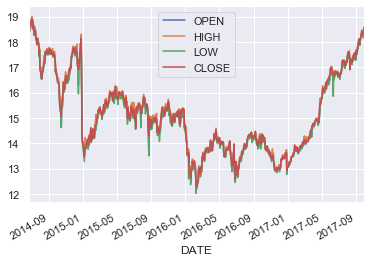

In [41]:
#train.plot(figsize=(10,12))
train.plot()

What we're going to try to predict (the *future*):

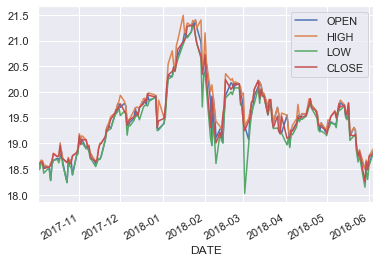

In [42]:
test.plot()

Normalize the dataset! You should do this *every time*, with *all* datasets. This makes sure all columns vary in the same range. If you don't do this, the columns with the bigger numbers will overshadow the columns with the smaller numbers, even though all columns might be just as important for the end result!

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [44]:
test_sc.shape

(169, 4)

Oops! This is now a numpy array. We need to turn it back into a pandas dataframe!

In [45]:
train_sc_df = pd.DataFrame(train_sc, columns=['OPEN', 'HIGH', 'LOW', 'CLOSE'], index=train.index)
train_sc_df

,OPEN,HIGH,LOW,CLOSE
DATE,,,,
2014-06-23,1.000000,1.000000,1.000000,1.000000
2014-06-24,0.979442,0.985075,0.982684,0.981982
2014-06-25,0.942731,0.950746,0.948052,0.947447
2014-06-26,0.922173,0.931358,0.923521,0.936937
2014-06-27,0.938326,0.937313,0.936508,0.948949
...,...,...,...,...
2017-09-25,0.903084,0.912836,0.919192,0.915931
2017-09-26,0.898678,0.897015,0.904762,0.900901
2017-09-27,0.882526,0.880597,0.886017,0.893393


Let's veridy we get the same plot (with scaled *y*'s)

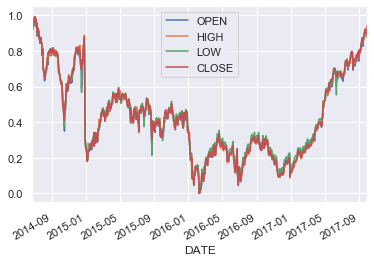

In [46]:
train_sc_df.plot()

Turn `test_sc` back into a pandas dataframe:

In [47]:
test_sc_df = pd.DataFrame(test_sc, columns=['OPEN', 'HIGH', 'LOW', 'CLOSE'], index=test.index)
test_sc_df

,OPEN,HIGH,LOW,CLOSE
DATE,,,,
2017-10-02,0.917768,0.930328,0.932179,0.936051
2017-10-03,0.920705,0.935821,0.935065,0.950450
2017-10-04,0.938326,0.943836,0.953824,0.953453
2017-10-05,0.938326,0.943299,0.950967,0.953453
2017-10-06,0.925110,0.931343,0.923564,0.933934
...,...,...,...,...
2018-05-29,0.920705,0.919403,0.884560,0.895826
2018-05-30,0.914831,0.944478,0.930736,0.954955
2018-05-31,0.922173,0.920896,0.906378,0.930931


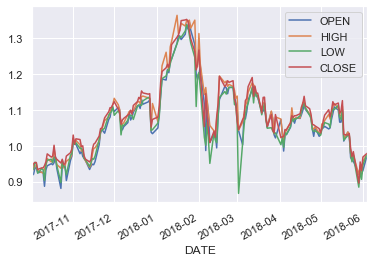

In [48]:
test_sc_df.plot()

Let's drop all columns other than the closing price:

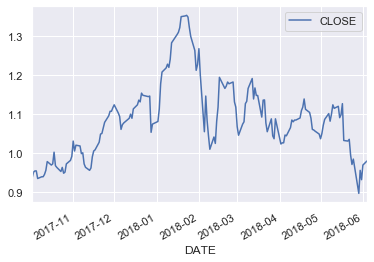

In [49]:
test_sc_df.drop(['OPEN', 'HIGH', 'LOW'], axis=1, inplace=True)
test_sc_df.plot()

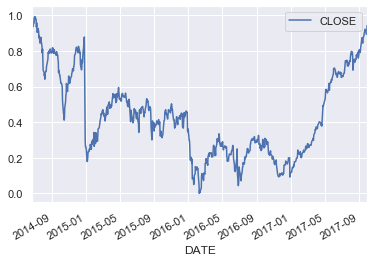

In [50]:
train_sc_df.drop(['OPEN', 'HIGH', 'LOW'], axis=1, inplace=True)
train_sc_df.plot()

Now let's create that new column so that a single row contains past price and future price (by one day):

In [51]:
for s in range(1,2):
    train_sc_df['CLOSE+{}'.format(s)] = train_sc_df['CLOSE'].shift(-s)
    test_sc_df['CLOSE+{}'.format(s)] = test_sc_df['CLOSE'].shift(-s)

In [52]:
train_sc_df

,CLOSE,CLOSE+1
DATE,,
2014-06-23,1.000000,0.981982
2014-06-24,0.981982,0.947447
2014-06-25,0.947447,0.936937
2014-06-26,0.936937,0.948949
2014-06-27,0.948949,0.957973
...,...,...
2017-09-25,0.915931,0.900901
2017-09-26,0.900901,0.893393
2017-09-27,0.893393,0.899399


In [53]:
test_sc_df

,CLOSE,CLOSE+1
DATE,,
2017-10-02,0.936051,0.950450
2017-10-03,0.950450,0.953453
2017-10-04,0.953453,0.953453
2017-10-05,0.953453,0.933934
2017-10-06,0.933934,0.938438
...,...,...
2018-05-29,0.895826,0.954955
2018-05-30,0.954955,0.930931
2018-05-31,0.930931,0.968468


Now let's drop the future price from the training and test datasets and make that our *dependent variable* (what to predict):

In [54]:
X_train = train_sc_df.dropna().drop('CLOSE+1', axis=1)
y_train = train_sc_df.dropna().drop('CLOSE', axis=1)

X_test = test_sc_df.dropna().drop('CLOSE+1', axis=1)
y_test = test_sc_df.dropna().drop('CLOSE', axis=1)

In [55]:
X_train

,CLOSE
DATE,
2014-06-23,1.000000
2014-06-24,0.981982
2014-06-25,0.947447
2014-06-26,0.936937
2014-06-27,0.948949
...,...
2017-09-22,0.921922
2017-09-25,0.915931
2017-09-26,0.900901


In [56]:
y_train

,CLOSE+1
DATE,
2014-06-23,0.981982
2014-06-24,0.947447
2014-06-25,0.936937
2014-06-26,0.948949
2014-06-27,0.957973
...,...
2017-09-22,0.915931
2017-09-25,0.900901
2017-09-26,0.893393


The next cell below is *optional*. It turns pandas dataframes to numpy matrices. `Sklearn` APIs should work with both types. Heck, let's try to *skip* the next cell (don't run it, run the  one *following* :-)

In [57]:
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [58]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (825 x 1)
Test size: (168 x 1)


Now let's create a random forest:

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Create a model 
rf_model = RandomForestRegressor()

Let's train it with our training data:

In [60]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Our random forest is trained! Let's see how well trained it is by seeing if we can predict the future (the test dataset):

In [61]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

-1.214334194909648

Awful! Our model is *awful* at predicting the future! Let's actually *plot* the model's prediction:

In [62]:
y_pred = rf_model.predict(X_test)

In [63]:
type(y_test)

numpy.ndarray

In [64]:
type(y_pred)

numpy.ndarray

If the types above are *different*. you need to convert either y_test or `y_pred` into the sme type to be able to plot the data. Let's say we convert to a pandas dataframe, this is how to do it:
```(python)
y_pred_df = pd.DataFrame(y_pred, columns=['CLOSE'], index=y_test.index)
```

In [65]:
y_pred_df = pd.DataFrame(y_pred, columns=['CLOSE'], index=y_test.index)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [66]:
type(y_pred_df)

NameError: name 'y_pred_df' is not defined

NameError: name 'y_pred_df' is not defined

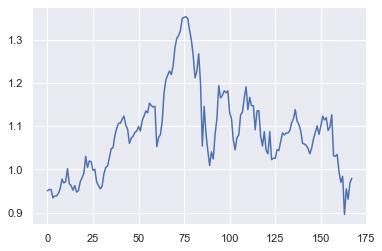

In [67]:
plt.plot(y_test)
plt.plot(y_pred_df)

Oh noooo... We seem to do ok for a few days, and then... disaster!

<br />
<center>
<img src="ipynb.images/garfield-oh-no.png" width=200 />
</center>

How about we use a different ML algorithm, like a Support Vector Machine (SVM), for example? You haven't seen this yet in class, but you will!

In [225]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [226]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [227]:
type(y_test)

pandas.core.frame.DataFrame

In [228]:
type(y_pred)

numpy.ndarray

In [229]:
y_pred_df = pd.DataFrame(y_pred, columns=['CLOSE'], index=y_test.index)

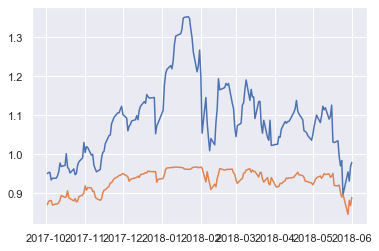

In [230]:
plt.plot(y_test)
plt.plot(y_pred_df)

Oh noooo... We fare a little bit better than with the random forest, but we severely underestimate the price, especially that big maximum hump in blue around january 2018!


<br />
<center>
<img src="ipynb.images/garfield-oh-no.png" width=200 />
</center>

How about a Neural Network? Don't worry, we'll learn all about Artificial Neural Networks in class, this is just a preview. For this to work, you will need Keras and/or tensorflow. If your `pip install`s do not work, you can wait for when we do this in class, or you can ask your TAs.

In [231]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

One hidden layer with one Neuron, 100 timesteps:

In [232]:
#K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1)

Epoch 1/100
825/825 [==============================] - 0s 58us/step - loss: 0.5032
Epoch 2/100
825/825 [==============================] - 0s 36us/step - loss: 0.4164
Epoch 3/100
825/825 [==============================] - 0s 30us/step - loss: 0.3402
Epoch 4/100
825/825 [==============================] - 0s 29us/step - loss: 0.2757
Epoch 5/100
825/825 [==============================] - 0s 30us/step - loss: 0.2232
Epoch 6/100
825/825 [==============================] - 0s 23us/step - loss: 0.1812
Epoch 7/100
825/825 [==============================] - 0s 23us/step - loss: 0.1485
Epoch 8/100
825/825 [==============================] - 0s 28us/step - loss: 0.1235
Epoch 9/100
825/825 [==============================] - 0s 24us/step - loss: 0.1047
Epoch 10/100
825/825 [==============================] - 0s 30us/step - loss: 0.0905
Epoch 11/100
825/825 [==============================] - 0s 23us/step - loss: 0.0800
Epoch 12/100
825/825 [==============================] - 0s 35us/step - loss: 0.0722
E

In [233]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: -2.134637


In [ ]:
y_pred = model.predict(X_test)

In [234]:
y_pred_df = pd.DataFrame(y_pred, columns=['CLOSE'], index=y_test.index)

R-Squared: -5.773172


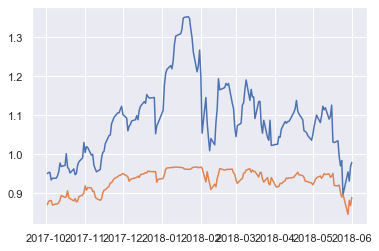

In [235]:
plt.plot(y_test)
plt.plot(y_pred_df)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

Hmmm, is that a bit better than our SVM? How about we increase the *intelligence* of our neural network with 2 Hidden Layers and 50 neurons each, and a [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function as well?


<br />
<center>
<img src="ipynb.images/champagne-glass-cake.jpg" width=300 />
</center>

In [276]:
#K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=50, verbose=1)

Epoch 1/50
825/825 [==============================] - 0s 28us/step - loss: 0.0355
Epoch 2/50
825/825 [==============================] - 0s 42us/step - loss: 0.0012
Epoch 3/50
825/825 [==============================] - 0s 53us/step - loss: 9.9894e-04
Epoch 4/50
825/825 [==============================] - 0s 45us/step - loss: 0.0011
Epoch 5/50
825/825 [==============================] - 0s 52us/step - loss: 9.7887e-04
Epoch 6/50
825/825 [==============================] - 0s 41us/step - loss: 9.9219e-04
Epoch 7/50
825/825 [==============================] - 0s 47us/step - loss: 9.9230e-04
Epoch 8/50
825/825 [==============================] - 0s 42us/step - loss: 9.9427e-04
Epoch 9/50
825/825 [==============================] - 0s 37us/step - loss: 9.9652e-04
Epoch 10/50
825/825 [==============================] - 0s 34us/step - loss: 9.7677e-04
Epoch 11/50
825/825 [==============================] - 0s 34us/step - loss: 0.0011
Epoch 12/50
825/825 [==============================] - 0s 37us/step 

In [277]:
y_pred = model.predict(X_test)

In [278]:
y_pred_df = pd.DataFrame(y_pred, columns=['CLOSE'], index=y_test.index)

R-Squared: 0.884543


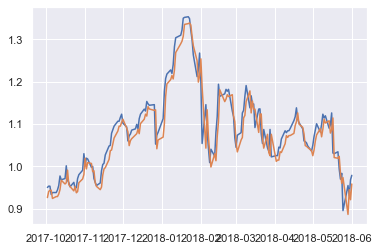

In [279]:
plt.plot(y_test)
plt.plot(y_pred_df)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

Oooooh.. 88%! This model appears to work!

But... does it?

# About Time Series prediction

First of all, a really ***stupid*** way to do Machine Learning on financial data is to look for how many days in the past I can predict stock price... ***from stock price itself***: You may not predict a dependent variable from the ***same*** variable that you will call ***independent*** in the days prior, unless you ***first process those historical values in some way***.

This is ***flawed ML***, and you would be surprised at how many people do that. Why is it flawed? It is ***not*** the price that decides what the price is going to be (in the future)! It's ***market forces*** that shape the price! So ML should attempt to uncover those market forces! And it probably could, if we give it the *right columns*. But we didn't! We just used the price in the past to attempt to predict the price in the future! That is like learning how to land a plane by looking at runway lights (which light up different colors depending on how we're doing, coming in too high or too low), instead of learning how to fly by understanding the dynamics of flight. The too-low lights *don't tell us why we're too low*! (*But if you learn to fly just by using a flight simulator, you might just look at runway lights to land the plane*!)

Poor little Machine Learning algorithm will however do its *best* and attempt to predict future price from past price. But guess what it will uncover... Obviously, the ***best*** predictor of $y$ at time $t$ is $y$ at time $t-1$! So, **day - 1** will always work ***great*** as a predictor for **day 0**, **day - 2** also, albeit less so, and so on until it stops working as we increase the number of days we go in the past.

Neural networks, arguably the *smartest* of all ML algorithms as we increase their intelligence (add more layers and more neurons), will figure out that this constitues the *best strategy*, and so they ***did just that***!

Did ***you*** do that, too?

<br />
<center>
<img src="ipynb.images/oh-no.png" width=200 />
    Oh no!! I did what professor said I should not do!
</center>

>**LESSON LEARNED**: You need to find your *independent variables* ***first***, and ***then*** see if they are good predictors of your *dependent variable* (target)! Machine Learning is ***not*** a replacement for Science! You still have to do the Science to figure out **cause** and **effect**, and only ***then*** use statistics (and ML) to help with prediction. Absent Science, smart ML algorithms will do what humans do: ***cheat*** and just look at the previous days's stock price to predict the next, just because it is the closest possible value. BUT THIS STRATEGY DOES NOT ***LEVERAGE HISTORICAL INFORMATION ON THE STOCK TO MAKE AN EDUCATED GUESS ON THE FUTURE BEHAVIOR OF THE STOCK***! So you will earn a little money when you guess right, loose a little money when you guess wrong, and at the end you will have guessed very close, but you will make no profit and loose lots of money from the overhead associated with every stock transaction.

Why did the last (Neural Network) example appear to work? Well, it really didn't! Since the best guess for any stock price point is the price for the previous day, ***that is what*** the neural network uses as a prediction. Since we plot all predictions next to the real label and it is close to the price for the previous day, it just ***appears*** that the prediction is working. But all we're doing is plotting repeating points (the label and the prediction) which happen to be next to each other. This is not a solution, even though it seems it is because we get two matching plots. 

>**Technical Analysis**: Point values of stock price cannot be used to estimate future stock price. However, integral values (aggregated values ***over*** a specified time period, like **averages**) ***may***. That is the impetus behind what is called **financial [technical analysis](https://en.wikipedia.org/wiki/Technical_analysis)** (TA). [This](https://school.stockcharts.com/doku.php?id=overview:technical_analysis) is also a great reference.

>**Efficient-market hypothesis**: You should know however that the **[efficient-market hypothesis](https://en.wikipedia.org/wiki/Efficient-market_hypothesis)** (EMH) contradicts the basic tenets of technical analysis by stating that [past prices cannot be used to profitably predict future prices]() in any shape or form.

Here is an example of flawed (but pretty impressive in itself) learning: A Google AI learned how to run, but nobody told it that humans like to conserve energy while running, because energy is in limited quantities with us humans. So the AI learned to balance itself with pretty enormous expenditures of energy, leading to physically unrealistic solutions for balance (look at the arms waving wildly): 

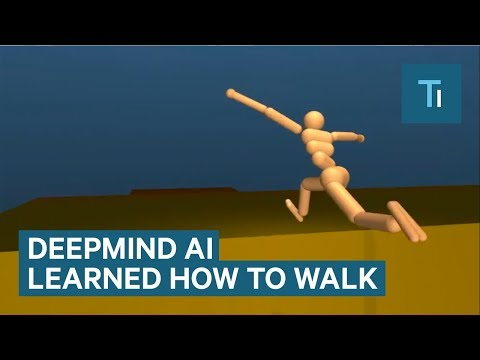

In [242]:
from IPython.display import YouTubeVideo
YouTubeVideo('gn4nRCC9TwQ')

For another good explanation of why predicting a random variable from itself is ***junk science***, and why time series **stationarity** is so critical, read [this](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424) good article.

>**LESSON LEARNED**: The only prediction that is relevant is the ***difference between consecutive days***. This is also known as introducing **stationarity** in the dataset: Statistics such as the **mean**, the **standard deviation**, **autocorrelation** need to ***remain constant over time***. 

<br />
<center>
<img src="ipynb.images/will-smith-aladin-2.jpg" width=400 />
    You need to learn statistics..
</center>

So I went looking for **independent variables**. Since everyone seems to download **prices** and **volumes**, I surmised these are used to ***compute*** independent variables to make decisions with, so I went looking for financial indicators that can be computed from these basic metrics. In other words, I am making the hypothesis (unproven) that ***financial technical analysis (TA) works***. Scikit-Learn should be able to tell me if it does or not, in the end.

Specifically, I would like to know if financial indicators provided by **technical analysis** (TA) can predict up and down trends of the stock. So I plan on leveraging the library i located first (`investpy` and `trendnet`) to give me the **up** and **down** intervals for a stock, and to see if those can be predicted from financial indicators.

This is the ***scientific procedure***. It may not work and my financial knowledge is limited, but the *procedure* is correct, and my results will either prove or disprove my hypothesis.

So now that you know why this kind of learning *does not work*, let's prove it by making our time series **stationary**, and rerunning our last neural network experiment that ***appeared to work so well***..

In [250]:
X_train

,CLOSE
DATE,
2014-06-23,1.000000
2014-06-24,0.981982
2014-06-25,0.947447
2014-06-26,0.936937
2014-06-27,0.948949
...,...
2017-09-22,0.921922
2017-09-25,0.915931
2017-09-26,0.900901


In [251]:
X_train2 = X_train.as_matrix()
y_train2 = y_train.as_matrix()

X_test2 = X_test.as_matrix()
y_test2 = y_test.as_matrix()

We calculate the n-th (n=1 is the default) discrete difference along a given axis to evaluate gains/losses (today's price minus yesterday's), using numpy's [diff](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) API. This makes the series **stationary**:

In [256]:
import numpy as np
X_train3 = np.diff(np.squeeze(X_train2))
y_train3 = np.diff(np.squeeze(y_train2))
X_test3 = np.diff(np.squeeze(X_test2))
y_test3 = np.diff(np.squeeze(y_test2))

In [257]:
X_train3

array([-1.80180180e-02, -3.45345345e-02, -1.05105105e-02,  1.20120120e-02,
        9.02402402e-03,  3.00150150e-02, -1.35135135e-02,  1.80180180e-02,
       -1.62162162e-02, -4.23423423e-02,  2.40240240e-02, -4.05405405e-02,
       -1.35135135e-02,  2.25225225e-02, -1.05105105e-02, -4.50450450e-03,
       -3.75375375e-02,  9.00900901e-03, -3.90390390e-02,  1.05105105e-02,
        1.95195195e-02,  3.00300300e-03, -1.95195195e-02, -3.30330330e-02,
       -3.60360360e-02,  2.25225225e-02, -6.30630631e-02, -5.70570571e-02,
       -9.00900901e-03, -1.95195195e-02,  4.50450450e-03, -2.55255255e-02,
        3.30330330e-02,  1.20120120e-02,  0.00000000e+00,  2.55255255e-02,
        9.00900901e-03,  6.00600601e-03,  2.70420420e-02,  3.75225225e-02,
       -3.00300300e-03,  1.05105105e-02, -1.20120120e-02,  7.50750751e-03,
        1.65165165e-02, -3.45345345e-03, -1.45645646e-02, -4.50450450e-03,
        1.50150150e-03,  2.70270270e-02, -3.00300300e-03,  1.50150150e-03,
       -2.94294294e-02,  

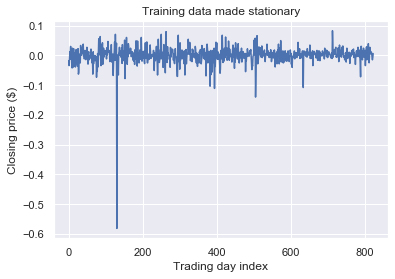

In [259]:
plt.plot(X_train3)
plt.title('Training data made stationary')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day index')
plt.grid(True)
plt.show()

Let's predict! Notice how I need to *reshape* my data to accomodate the requirements of `keras`'s `fit()` API:

In [261]:
X_train.shape

(825, 1)

In [262]:
X_train3.shape

(824,)

In [264]:
X_train3.shape[0]

824

In [267]:
X_train4 = X_train3.reshape((X_train3.shape[0], 1))
X_train4.shape

(824, 1)

In [268]:
y_train4 = y_train3.reshape((y_train3.shape[0], 1))
X_test4 = X_test3.reshape((X_test3.shape[0], 1))
y_test4 = y_test3.reshape((y_test3.shape[0], 1))

In [280]:
#K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test4.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test4.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train4, y_train4, batch_size=16, epochs=50, verbose=1)

Epoch 1/50
824/824 [==============================] - 0s 30us/step - loss: 0.0010
Epoch 2/50
824/824 [==============================] - 0s 33us/step - loss: 0.0010
Epoch 3/50
824/824 [==============================] - 0s 35us/step - loss: 0.0011
Epoch 4/50
824/824 [==============================] - 0s 51us/step - loss: 0.0010
Epoch 5/50
824/824 [==============================] - 0s 30us/step - loss: 9.9281e-04
Epoch 6/50
824/824 [==============================] - 0s 38us/step - loss: 9.7749e-04
Epoch 7/50
824/824 [==============================] - 0s 36us/step - loss: 0.0010
Epoch 8/50
824/824 [==============================] - 0s 31us/step - loss: 9.9392e-04
Epoch 9/50
824/824 [==============================] - 0s 40us/step - loss: 0.0010
Epoch 10/50
824/824 [==============================] - 0s 39us/step - loss: 9.9355e-04
Epoch 11/50
824/824 [==============================] - 0s 39us/step - loss: 9.9122e-04
Epoch 12/50
824/824 [==============================] - 0s 36us/step - loss: 

In [281]:
y_pred4 = model.predict(X_test4)

In [284]:
type(y_test4)

numpy.ndarray

In [285]:
type(y_pred4)

numpy.ndarray

R-Squared: -0.015498


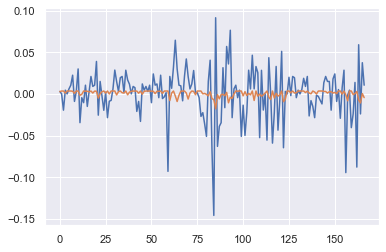

In [286]:
plt.plot(y_test4)
plt.plot(y_pred4)
print('R-Squared: %f'%(r2_score(y_test4, y_pred4)))

Horrible! *As expected*!

Prediction of time series from the time series *itself* is ***not possible***! If it where, ***I would not be teaching you today***! I'd be a millionaire driving a Maserati and lounging in the Marino gym checking out the crowd ;-)

So what exactly do [quants](https://en.wikipedia.org/wiki/Quantitative_analysis_(finance)) do on *Wall Street*?

<br />
<center>
<img src="ipynb.images/quants.jpg" width=400 />
A quant making a million dollar salary
</center>

# Financial Indicators

[This](https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp) is where I learned about financial indicators. 

Here is what I learned:

##  Price Action
[Price action](https://www.investopedia.com/terms/p/price-action.asp) is the movement of a security's price plotted over time. Price action forms the basis for all technical analysis of a stock, commodity or other asset chart. Many short-term traders rely exclusively on price action and the formations and trends extrapolated from it to make trading decisions. Technical analysis as a practice is a derivative of price action since it uses past prices in calculations that can then be used to inform trading decisions.

### What Does Price Action Tell You?
Price action can be seen and interpreted using charts that plot prices over time. Traders use different chart compositions to improve their ability to spot and interpret trends, breakouts and reversals. Many traders use candlestick charts since they help better visualize price movements by displaying the open, high, low, and close values in the context of up or down sessions.

>**LESSON**: This tells me that it is important to understand price actions in the context of the DOW Jones industrial average. So I plan to add columns that reflect how the DOW is trending.

## What is a Reversal?
A [reversal](https://www.investopedia.com/terms/r/reversal.asp) is a change in the price direction of an asset. A reversal can occur to the upside or downside. Following an uptrend, a reversal would be to the downside. Following a downtrend, a reversal would be to the upside. Reversals are based on overall price direction and are not typically based on one or two periods/bars on a chart.

## Moving Averages
Moving averages ***smooth*** price data by creating a single flowing line. The line represents the average price over a period of time. Which moving average the trader decides to use is determined by the time frame in which he or she trades. For investors and long-term trend followers, the 200-day, 100-day, and 50-day simple moving average are popular choices.

There are several ways to utilize the moving average. The first is to look at the angle of the moving average. If it is mostly moving horizontally for an extended amount of time, then the price isn't trending, it is ranging. If the moving average line is angled up, an uptrend is underway. Moving averages don't predict though; they simply show what the price is doing, on average, over a period of time.

When the price crosses above a moving average, it can also be used as a buy signal, and when the price crosses below a moving average, it can be used as a sell signal. Since the price is more volatile than the moving average, this method is prone to more false signals, as the chart above shows.

Many traders will watch for a short-term moving average to cross above a longer-term moving average and use this to signal increasing upward momentum. This bullish crossover suggests that the price has recently been rising at a faster rate than it has in the past, so it is a common technical buy sign. Conversely, a short-term moving average crossing below a longer-term average is used to illustrate that the asset's price has been moving downward at a faster rate and that it may be a good time to sell.

Crossovers are another way to utilize moving averages. By plotting a 200-day and 50-day moving average on your chart, a buy signal occurs when the 50-day crosses above the 200-day. A sell signal occurs when the 50-day drops below the 200-day.

## MACD (Moving Average Convergence Divergence)
The [MACD](https://www.investopedia.com/trading/macd/) was designed to profit by analyzing the difference between the two exponential moving averages (EMAs). Specifically, the value for the long-term moving average is subtracted from the short-term average, and the result is plotted onto a chart. The periods used to calculate the MACD can be easily customized to fit any strategy, but traders will commonly rely on the default settings of 12- and 26-day periods.

A positive MACD value, created when the short-term average is above the longer-term average, is used to signal increasing upward momentum. This value can also be used to suggest that traders may want to refrain from taking short positions until a signal suggests it is appropriate. On the other hand, falling negative MACD values suggest that the downtrend is getting stronger, and that it may not be the best time to buy.

One basic MACD strategy is to look at which side of zero the MACD lines are on in the histogram below the chart. Above zero for a sustained period of time, and the trend is likely up; below zero for a sustained period of time, and the trend is likely down. Potential buy signals occur when the MACD moves above zero, and potential sell signals when it crosses below zero.

Signal line crossovers provide additional buy and sell signals. A MACD has two lines – a fast line and a slow line. A buy signal occurs when the fast line crosses through and above the slow line. A sell signal occurs when the fast line crosses through and below the slow line.

The MACD indicator is the most popular tool in technical analysis because it gives traders the ability to quickly and easily identify the short-term trend direction. The clear transaction signals help minimize the subjectivity involved in trading, and the crosses over the signal line make it easy for traders to ensure that they are trading in the direction of momentum. Very few indicators in technical analysis have proved to be more reliable than the MACD, and this relatively simple indicator can quickly be incorporated into any short-term trading strategy.

## Volume As An Indicator
Volume is an important indicator in technical analysis as it is used to measure the relative worth of a market move. If the markets make a strong price movement, then the strength of that movement depends on the volume for that period. The higher the volume during the price move, the more significant the move.

Fundamental analysis is based on company performance and is used to determine which stock to buy. Technical analysis is based on stock price and is used to determine when to buy. Technical analysts are primarily looking for entry and exit price points, and volume levels provide clues about where the best entry and exit points are located.

Volume is one of the most important measures of strength for traders and technical analysts. Put simply, volume refers to the number of trades completed. For any trade to occur, the market needs to produce a buyer and a seller. A transaction occurs when buyers and sellers meet and is referred to as the market price. From an auction perspective, when buyers and sellers become particularly active at a certain price, it means there is a lot of volume.

If traders want to confirm a reversal on a level of support, or floor, they look for high buying volume. Conversely, if traders are looking to confirm a break in the level of support, they look for low volume from buyers. If traders want to confirm a reversal on a level of resistance, or ceiling, they look for high selling volume. Conversely, if traders are looking to confirm a break in the level of resistance, they look for high volume from buyers.

### Calculating OBV
[On-balance volume](https://www.investopedia.com/terms/o/onbalancevolume.asp) provides a running total of an asset's trading volume and indicates whether this volume is flowing in or out of a given security or currency pair. The OBV is a cumulative total of volume (positive and negative). There are three rules implemented when calculating the OBV. They are:

- If today's closing price is higher than yesterday's closing price, then: Current OBV = Previous OBV + today's volume


- If today's closing price is lower than yesterday's closing price, then: Current OBV = Previous OBV - today's volume


- If today's closing price equals yesterday's closing price, then: Current OBV = Previous OBV

The theory behind OBV is based on the distinction between smart money – namely, institutional investors – and less sophisticated retail investors. As mutual funds and pension funds begin to buy into an issue that retail investors are selling, volume may increase even as the price remains relatively level. Eventually, volume drives the price upward. At that point, larger investors begin to sell, and smaller investors begin buying.

Despite being plotted on a price chart and measured numerically, the actual individual quantitative value of OBV is not relevant. The indicator itself is cumulative, while the time interval remains fixed by a dedicated starting point, meaning the real number value of OBV arbitrarily depends on the start date. Instead, traders and analysts look to the nature of OBV movements over time; the slope of the OBV line carries all of the weight of analysis.

Analysts look to volume numbers on the OBV to track large, institutional investors. They treat divergences between volume and price as a synonym of the relationship between "smart money" and the disparate masses, hoping to showcase opportunities for buying against incorrect prevailing trends. For example, institutional money may drive up the price of an asset, then sell after other investors jump on the bandwagon.

### Example Of How To Use On-Balance Volume
Below is a list of 10 days' worth of a hypothetical stock's closing price and volume:

- Day one: closing price equals \$10, volume equals 25,200 shares
- Day two: closing price equals \$10.15, volume equals 30,000 shares
- Day three: closing price equals \$10.17, volume equals 25,600 shares
- Day four: closing price equals \$10.13, volume equals 32,000 shares
- Day five: closing price equals \$10.11, volume equals 23,000 shares
- Day six: closing price equals \$10.15, volume equals 40,000 shares
- Day seven: closing price equals \$10.20, volume equals 36,000 shares
- Day eight: closing price equals \$10.20, volume equals 20,500 shares
- Day nine: closing price equals \$10.22, volume equals 23,000 shares
- Day 10: closing price equals \$10.21, volume equals 27,500 shares

As can be seen, days two, three, six, seven and nine are up days, so these trading volumes are added to the OBV. Days four, five and 10 are down days, so these trading volumes are subtracted from the OBV. On day eight, no changes are made to the OBV since the closing price did not change. Given the days, the OBV for each of the 10 days is:

- Day one OBV = 0
- Day two OBV = 0 + 30,000 = 30,000
- Day three OBV = 30,000 + 25,600 = 55,600
- Day four OBV = 55,600 - 32,000 = 23,600
- Day five OBV = 23,600 - 23,000 = 600
- Day six OBV = 600 + 40,000 = 46,600
- Day seven OBV = 46,600 + 36,000 = 76,600
- Day eight OBV = 76,600
- Day nine OBV = 76,600 + 23,000 = 99,600
- Day 10 OBV = 99,600 - 27,500 = 72,100

### The Difference Between OBV And Accumulation/Distribution
On-balance volume and the accumulation/distribution line are similar in that they are both momentum indicators that use volume to predict the movement of “smart money”. However, this is where the similarities end. In the case of on-balance volume, it is calculated by summing the volume on an up-day and subtracting the volume on a down-day.

The formula used to create the accumulation/distribution (Acc/Dist) line is quite different than the OBV shown above. The formula for the Acc/Dist, without getting too complicated, is that it uses the position of the current price relative to its recent trading range and multiplies it by that period's volume.

### Limitations Of OBV
One limitation of OBV is that it is a leading indicator, meaning that it may produce predictions, but there is little it can say about what has actually happened in terms of the signals it produces. Because of this, it is prone to produce false signals. It can therefore be balanced by lagging indicators. Add a moving average line to the OBV to look for OBV line breakouts; you can confirm a breakout in the price if the OBV indicator makes a concurrent breakout.

Another note of caution in using the OBV is that a large spike in volume on a single day can throw off the indicator for quite a while. For instance, a surprise earnings announcement, being added or removed from an index, or massive institutional block trades can cause the indicator to spike or plummet, but the spike in volume may not be indicative of a trend.

### Formula for OBV:
The Formula For OBV is:
$$\begin{aligned} &\text{OBV} = \text{OBV}_{prev} + \begin{cases} \text{volume,} & \text{if close} > \text{close}_{prev} \\ \text{0,} & \text{if close} = \text{close}_{prev} \\ -\text{volume,} & \text{if close} < \text{close}_{prev} \\ \end{cases} \\ &\textbf{where:} \\ &\text{OBV} = \text{Current on-balance volume level} \\ &\text{OBV}_{prev} = \text{Previous on-balance volume level} \\ &\text{volume} = \text{Latest trading volume amount} \\ \end{aligned}$$	

## Accumulation/Distribution Indicator (A/D)
Accumulation/distribution is a cumulative indicator that uses volume and price to assess whether a stock is being accumulated or distributed. The accumulation/distribution measure seeks to identify divergences between the stock price and volume flow. This provides insight into how strong a trend is. If the price is rising but the indicator is falling this indicates that buying or accumulation volume may not be enough to support the price rise and a price decline could be forthcoming.

The Formula for the Accumulation/Distribution Indicator is:

$$\frac{A}{D} = \text{Previous}\frac{A}{D} * \text{CMFV}$$

where:

CMFV = Current money flow volume

$$ \text{CMFV} = \frac{(P_C − P_L) − (P_H − P_C)}{(P_H − P_L)} * V$$

and

$P_C$ = Closing price

$P_L$ = Low price for the period

$P_H$ = High price for the period

$V$ = Volume for the period

The accumulation/distribution line helps to show how supply and demand factors are influencing price. A/D can move in the same direction as price changes or it may move in the opposite direction.

The multiplier in the calculation provides a gauge for how strong the buying or selling was during a particular period. It does this by determining whether the price closed in the upper or lower portion of its range. This is then multiplied by the volume. Therefore, when a stock closes near the high of the period's range, and has high volume, that will result in a large A/D jump. If the price finishes near the high of the range but volume is low, the A/D will not move up as much. If volume is high but the price finishes more toward the middle of the range, the A/D will also not move up as much.

The same concepts apply when the price closes in the lower portion of the period's price range. Both volume and where the price closes within the period's range determine how much the A/D will decline by.

The accumulation/distribution line is used to help assess price trends and potentially spot forthcoming reversals.

If a security's price is in a downtrend while the accumulation/distribution line is in an uptrend, the indicator shows there may be buying pressure and the security's price may reverse to the upside.

Conversely, if a security's price is in an uptrend while the accumulation/distribution line is in a downtrend, the indicator shows there may be selling pressure, or higher distribution. This warns that the price may be due for a decline.

# Decisions

>**WHAT I LEARNED**: I need to compute [agreggate statistics](https://en.wikipedia.org/wiki/Aggregate_data) on price indicators, and then use the aggregate statistics as independent columns to predict the closing price (dependent column, or *target*)!

So based on what I learned, I decided to focus on three indicators to evaluate, to add as columns to my dataset:

- MAD (difference) between a 200 day and a 50 days indicator
- MACD (difference) between single and double exponential smoothing
- OBVD (difference) derivative (slope) of OBV times derivative of price. If negative, smart money divergence is happening

.. and to include financial average columns, such as the [DOW](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).

Armed with this new knowledge, I went looking for python packages that implement these indicators (why write them myself when somebody else may have done the job already, right?).

And i stumbled onto [this](https://github.com/bukosabino/ta).

So i gave it a shot:
```(python)
pip install --upgrade ta
```

In [152]:
import pandas as pd
import pandas_datareader as web
import datetime

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2019, 1, 30)
aapl = web.DataReader('AAPL', 'yahoo', start, end)
aapl.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438
2016-01-11,99.059998,97.339996,98.970001,98.529999,49739400.0,92.073563
2016-01-12,100.690002,98.839996,100.550003,99.959999,49154200.0,93.409874
2016-01-13,101.190002,97.300003,100.320000,97.389999,62439600.0,91.008270
2016-01-14,100.480003,95.739998,97.959999,99.519997,63170100.0,92.998695


In [153]:
help(ta.add_all_ta_features)

Help on function add_all_ta_features in module ta.wrapper:

add_all_ta_features(df:pandas.core.frame.DataFrame, open:str, high:str, low:str, close:str, volume:str, fillna:bool=False, colprefix:str='') -> pandas.core.frame.DataFrame
    Add all technical analysis features to dataframe.
    
    Args:
        df (pandas.core.frame.DataFrame): Dataframe base.
        open (str): Name of 'open' column.
        high (str): Name of 'high' column.
        low (str): Name of 'low' column.
        close (str): Name of 'close' column.
        volume (str): Name of 'volume' column.
        fillna(bool): if True, fill nan values.
        colprefix(str): Prefix column names inserted
    
    Returns:
        pandas.core.frame.DataFrame: Dataframe with new features.



In [154]:
import ta

# Clean NaN values
#df = ta.utils.dropna(df)
# Actually, if I run this, I get: an Error: IndexError: single positional indexer is out-of-bounds

# Add all ta features
aapl = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")
#aapl = ta.add_all_ta_features(aapl, open="Open", high="High", low="Low", close="Close", volume="Volume")

In [155]:
aapl.head()

,Date,Open,High,Low,Close,Volume,Currency,Up Trend,Down Trend,volume_adi,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,2018-01-02,170.16,172.30,169.26,172.26,25560000,USD,NaN,NaN,2.488737e+07,...,NaN,98.684211,98.684211,-1.315789,0.0,NaN,NaN,-13.295050,NaN,0.000000
1,2018-01-03,172.53,174.55,171.96,172.23,29520000,USD,NaN,NaN,1.522117e+06,...,NaN,56.143667,77.413939,-43.856333,0.0,NaN,NaN,-0.017416,-0.017417,-0.017416
2,2018-01-04,172.54,173.47,172.08,173.03,22430000,USD,A,NaN,9.751830e+06,...,NaN,71.266541,75.364806,-28.733459,0.0,NaN,NaN,0.464495,0.463420,0.446999
3,2018-01-05,173.44,175.37,173.05,175.00,23660000,USD,A,NaN,2.586511e+07,...,NaN,93.944354,73.784854,-6.055646,0.0,NaN,NaN,1.138531,1.132098,1.590619
4,2018-01-08,174.35,175.61,173.93,174.35,20570000,USD,A,NaN,1.558011e+07,...,NaN,80.157480,81.789458,-19.842520,0.0,NaN,NaN,-0.371429,-0.372120,1.213282


What are all the columns?

In [156]:
aapl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency',
       'Up Trend', 'Down Trend', 'volume_adi', 'volume_obv', 'volume_cmf',
       'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch',
       'volatility_dchi', 'volatility_dcli', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_a',
       'trend_ichimoku_b', 'trend_visual_ichimoku_a',
       'trend_visual_i

Wow, that's a lot of financial indicators! Maybe I don't even need to add my own ones (the ones I mentionned above) because this data frame already includes them!

In [157]:
aapl.T

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
Date,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,2018-01-11 00:00:00,2018-01-12 00:00:00,2018-01-16 00:00:00,...,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
Open,170.16,172.53,172.54,173.44,174.35,174.55,173.16,174.59,176.18,177.9,...,279.57,279.8,279.5,282.23,280.53,284.69,284.82,291.12,289.46,289.93
High,172.3,174.55,173.47,175.37,175.61,175.06,174.3,175.49,177.36,179.39,...,281.77,281.9,281.18,282.65,284.25,284.89,289.98,293.97,292.69,293.68
Low,169.26,171.96,172.08,173.05,173.93,173.41,173,174.49,175.65,176.14,...,278.8,279.12,278.95,278.56,280.37,282.92,284.7,288.12,285.22,289.52
Close,172.26,172.23,173.03,175,174.35,174.33,174.29,175.28,177.09,176.19,...,280.41,279.74,280.02,279.44,284,284.27,289.91,289.8,291.52,293.65
Volume,25560000,29520000,22430000,23660000,20570000,21580000,23960000,18670000,25420000,29570000,...,28580000,29020000,24630000,69030000,24680000,12120000,23330000,36590000,36060000,25250000
Currency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
Up Trend,NaN,NaN,A,A,A,A,A,A,A,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Down Trend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume_adi,2.48874e+07,1.52212e+06,9.75183e+06,2.58651e+07,1.55801e+07,1.80651e+07,4.16565e+07,5.24851e+07,6.98777e+07,4.12175e+07,...,3.69439e+08,3.53364e+08,3.52369e+08,3.13044e+08,3.34544e+08,3.39035e+08,3.61746e+08,3.46172e+08,3.70936e+08,3.95822e+08


Let me take a look at all columns by transposing the matrix and increasing the numner of rows to display, so I can do a bit of EDA (e.g. see which columns I should drop because they contain no relevant information).

In [158]:
pd.set_option('display.max_rows', 80)

In [159]:
aapl.T

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
Date,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,2018-01-11 00:00:00,2018-01-12 00:00:00,2018-01-16 00:00:00,...,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
Open,170.16,172.53,172.54,173.44,174.35,174.55,173.16,174.59,176.18,177.9,...,279.57,279.8,279.5,282.23,280.53,284.69,284.82,291.12,289.46,289.93
High,172.3,174.55,173.47,175.37,175.61,175.06,174.3,175.49,177.36,179.39,...,281.77,281.9,281.18,282.65,284.25,284.89,289.98,293.97,292.69,293.68
Low,169.26,171.96,172.08,173.05,173.93,173.41,173,174.49,175.65,176.14,...,278.8,279.12,278.95,278.56,280.37,282.92,284.7,288.12,285.22,289.52
Close,172.26,172.23,173.03,175,174.35,174.33,174.29,175.28,177.09,176.19,...,280.41,279.74,280.02,279.44,284,284.27,289.91,289.8,291.52,293.65
Volume,25560000,29520000,22430000,23660000,20570000,21580000,23960000,18670000,25420000,29570000,...,28580000,29020000,24630000,69030000,24680000,12120000,23330000,36590000,36060000,25250000
Currency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
Up Trend,NaN,NaN,A,A,A,A,A,A,A,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Down Trend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume_adi,2.48874e+07,1.52212e+06,9.75183e+06,2.58651e+07,1.55801e+07,1.80651e+07,4.16565e+07,5.24851e+07,6.98777e+07,4.12175e+07,...,3.69439e+08,3.53364e+08,3.52369e+08,3.13044e+08,3.34544e+08,3.39035e+08,3.61746e+08,3.46172e+08,3.70936e+08,3.95822e+08


The up and down trends are already included in the dataset, courtesy of our `trendnet` package!

In [79]:
aapl['Up Trend'].values

array([nan, nan, 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, 'C', 'C', 'C', 'C', 'C', 'C', 'C', nan, nan, nan, nan, nan,
       nan, nan, nan, 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E

It looks like trending periods are denoted by strings and otherwise `NaN`s.

In [80]:
type(aapl['Down Trend'].fillna(0)[10]) == type(1)

True

Let's transform up and down trend columns from **categorical** to **binary**:

In [160]:
aapl['Down_trend'] = [x if type(x)==type(0) else 150 for x in aapl['Down Trend'].fillna(0).values]
aapl['Up_trend'] = [x if type(x)==type(0) else 150 for x in aapl['Up Trend'].fillna(0).values]

Let's plot to verify:

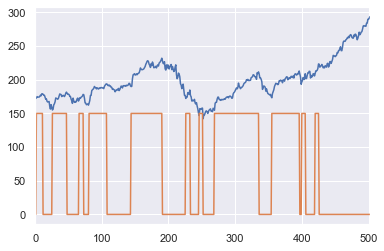

In [161]:
aapl['Close'].plot()
aapl['Up_trend'].plot()

Oh oh.. Looks like I need to do some **data healing** on the last up interval!

In [162]:
aapl['Up_trend'].values[425:]

array([150,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=int64)

In [163]:
for x in range(426, len(aapl['Up_trend'])):
    aapl['Up_trend'][x] = 150

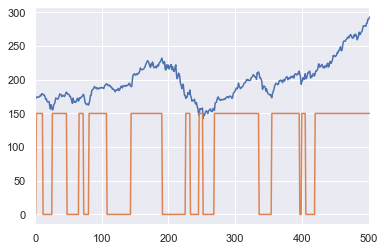

In [164]:
aapl['Close'].plot()
aapl['Up_trend'].plot()

Now let's look at down trend:

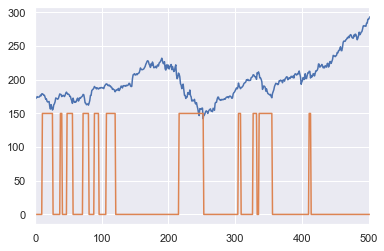

In [165]:
aapl['Close'].plot()
aapl['Down_trend'].plot()

A little blip at around x = 200 (missing a bit of downtrend). So let's fix it:

In [166]:
aapl['Down_trend'][200:300].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int64)

In [167]:
for x in range(200, 216):
    aapl['Down_trend'][x] = 150

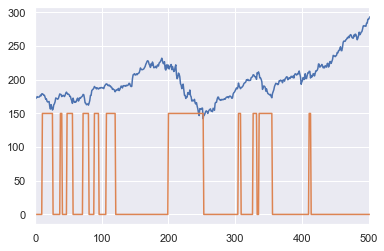

In [168]:
aapl['Close'].plot()
aapl['Down_trend'].plot()

Finally, I want to replace `NaN`s with zeros. I'll create a new data frame for this.

In [169]:
aapl2 = aapl.fillna(0)

Let's do some more EDA in Excel:

In [170]:
aapl2.to_excel('data/AAPL.xlsx', index=False)

Ok, let's drop the `Currency`, `Up Trend` and `Down Trend` columns (I built duplicates), and I think we're done!

In [171]:
drop_cols = ['Currency', 'Up Trend', 'Down Trend']
aapl2.drop(drop_cols, axis=1, inplace=True)
aapl2.head()

,Date,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,Down_trend,Up_trend
0,2018-01-02,170.16,172.30,169.26,172.26,25560000,2.488737e+07,25560000,0.973684,0.0,...,98.684211,-1.315789,0.0,0.0,0.0,-13.295050,0.000000,0.000000,0,0
1,2018-01-03,172.53,174.55,171.96,172.23,29520000,1.522117e+06,-3960000,0.027635,0.0,...,77.413939,-43.856333,0.0,0.0,0.0,-0.017416,-0.017417,-0.017416,0,0
2,2018-01-04,172.54,173.47,172.08,173.03,22430000,9.751830e+06,18470000,0.125814,0.0,...,75.364806,-28.733459,0.0,0.0,0.0,0.464495,0.463420,0.446999,0,150
3,2018-01-05,173.44,175.37,173.05,175.00,23660000,2.586511e+07,42130000,0.255660,0.0,...,73.784854,-6.055646,0.0,0.0,0.0,1.138531,1.132098,1.590619,0,150
4,2018-01-08,174.35,175.61,173.93,174.35,20570000,1.558011e+07,21560000,0.127979,0.0,...,81.789458,-19.842520,0.0,0.0,0.0,-0.371429,-0.372120,1.213282,0,150


I think I'm ready for partitioning my dataset into training and test datasets. What is the right partition?

I guess I really want to be able to predict up trends in the stock, because if I can, that means I should buy the stock before it up-trends. More specifically, I think I woulf like to be able to predict **reversals** (change in the price direction of an asset; a reversal can occur to the upside or downside; following an uptrend, a reversal would be to the downside; following a downtrend, a reversal would be to the upside). So I plan on removing, let's say, ***two*** reversal periods from the dataset, and see if these can be predicted from technical analysis (TA) indicators.

To ensure that i'm only using **historical data** (financial indicators) and not the price itself, I'm also going to remove the stock price columns from the list of independent variables (`Open`, `High`, `Low`, `Close`). My dependent variable will be `Up-trend`.

I'll attempt to predict the uptrend reversal from index 240 to 270, and the downtrend reversal from index 320 to 345. Here's the plot of the reversals:

In [219]:
len(aapl['Up_trend'])

503

In [173]:
import numpy as np
reversal_u = pd.Series(list(np.repeat(0, 503)))
reversal_d = pd.Series(list(np.repeat(0, 503)))
for x in range(240, 270):
    reversal_u[x] = 170
for x in range(320, 345):
    reversal_d[x] = 220

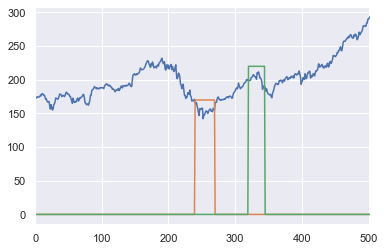

In [174]:
aapl['Close'].plot()
reversal_u.plot()
reversal_d.plot()

So I'm going to remove ***all*** knowledge between index 240 to 270, and between index 320 to 345 (including financial indicators within these indexes), and I'm going to see if my financial indicators (which were very possibly built ***with knowledge of prices within these periods***) *outside these periods* can predict the reversals.

I'm going to *include* future values in my first attempt. Some of you may say, "*professor, how can you include future values to predict past values*"?! I think that as long as the future is somewhat removed in time from the reversal, it probably does not make a difference and this allows me to just include more knowledge of stock behavior for indicators to be able to catch its dynamics.

Ready? Excited?

So let's remove *cheating* columns `Open`, `High`, `Low`, and `Close`, let's remove column `Date` (we have an index, we don't care about the date), and **dependent** (target) columns `Down_trend` and `Up_trend` to create our `X` dataframe:

In [175]:
drop_cols = ['Date', 'Open', 'High', 'Low', 'Close']
#aapl2.drop(drop_cols, axis=1, inplace=True)
X = aapl2.drop(drop_cols, axis=1)

In [176]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
Volume,2.556000e+07,2.952000e+07,2.243000e+07,2.366000e+07,2.057000e+07,2.158000e+07,2.396000e+07,1.867000e+07,2.542000e+07,2.957000e+07,...,2.858000e+07,2.902000e+07,2.463000e+07,6.903000e+07,2.468000e+07,1.212000e+07,2.333000e+07,3.659000e+07,3.606000e+07,2.525000e+07
volume_adi,2.488737e+07,1.522117e+06,9.751830e+06,2.586511e+07,1.558011e+07,1.806508e+07,4.165646e+07,5.248506e+07,6.987769e+07,4.121754e+07,...,3.694394e+08,3.533635e+08,3.523695e+08,3.130443e+08,3.345439e+08,3.390351e+08,3.617465e+08,3.461723e+08,3.709364e+08,3.958222e+08
volume_obv,2.556000e+07,-3.960000e+06,1.847000e+07,4.213000e+07,2.156000e+07,-2.000000e+04,-2.398000e+07,-5.310000e+06,2.011000e+07,-9.460000e+06,...,4.312400e+08,4.022200e+08,4.268500e+08,3.578200e+08,3.825000e+08,3.946200e+08,4.179500e+08,3.813600e+08,4.174200e+08,4.426700e+08
volume_cmf,9.736842e-01,2.763467e-02,1.258138e-01,2.556598e-01,1.279785e-01,1.260471e-01,2.490224e-01,2.822536e-01,3.305942e-01,1.710697e-01,...,2.787427e-01,2.526647e-01,2.526136e-01,1.838666e-01,2.267101e-01,2.008309e-01,2.564379e-01,1.919342e-01,2.211359e-01,2.928061e-01
volume_fi,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.125923e+07,3.258743e+07,2.891728e+07,1.906661e+07,3.242007e+07,2.825611e+07,4.301684e+07,3.629659e+07,3.997182e+07,4.194478e+07
volume_em,0.000000e+00,2.171494e+01,-2.974588e+00,1.407101e+01,4.573651e+00,-4.090593e+00,-3.174040e+00,7.177290e+00,1.019138e+01,1.384850e+01,...,1.454864e+01,2.155410e+00,-4.029030e+00,3.199478e+00,2.680470e+01,2.592533e+01,7.774025e+01,5.923545e+01,-4.329534e+01,4.357703e+01
volume_sma_em,0.000000e+00,2.171494e+01,9.370176e+00,1.093712e+01,9.346252e+00,6.658883e+00,5.020063e+00,5.328238e+00,5.936131e+00,6.815283e+00,...,1.607347e+01,1.411549e+01,1.343500e+01,1.525552e+01,2.342455e+01,2.071124e+01,2.346385e+01,2.287709e+01,2.147762e+01,2.444410e+01
volume_vpt,-3.408375e+06,-3.403356e+06,9.904520e+04,3.735627e+05,1.929736e+05,-7.887834e+04,-7.973100e+03,1.005515e+05,3.685445e+05,1.122159e+05,...,6.053107e+05,-1.317181e+04,-4.468629e+04,-1.183276e+05,2.597564e+05,4.142594e+05,4.743966e+05,4.489908e+05,2.001374e+05,3.985106e+05
volume_nvi,1.000000e+03,1.000000e+03,1.004645e+03,1.004645e+03,1.000913e+03,1.000913e+03,1.000913e+03,1.006599e+03,1.006599e+03,1.006599e+03,...,1.953150e+03,1.953150e+03,1.955105e+03,1.955105e+03,1.987010e+03,1.988899e+03,1.988899e+03,1.988899e+03,2.000703e+03,2.015321e+03
volatility_atr,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.055000e+00,...,4.298019e+00,4.146217e+00,3.954595e+00,3.968136e+00,4.052322e+00,3.844090e+00,4.030681e+00,4.212613e+00,4.538352e+00,4.500516e+00


In [177]:
X_columns = X.columns
X_columns

Index(['Volume', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch',
       'volatility_dchi', 'volatility_dcli', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_a',
       'trend_ichimoku_b', 'trend_visual_ichimoku_a',
       'trend_visual_ichimoku_b', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind', 'trend_ps

Let's normalize our dataframe. This ensures all numbers are in the same range, so no one column can overshadow another column with bigger numbers. This gives ML algorithms the chance to determine *for themselves* which columns are more predictive than others.

In [179]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)

In [181]:
X_sc.T.shape

(70, 503)

Now that our data is normalized, let's return it to a pandas DataFrame:

In [182]:
X_sc_df = pd.DataFrame(X_sc, columns=X_columns, index=X.index)
X_sc_df.T

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
Volume,0.167275,0.213924,0.130404,0.144893,0.108493,0.120391,0.148427,0.086111,0.165626,0.214513,...,0.202851,0.208034,0.156320,0.679350,0.156909,0.008953,0.141006,0.297208,0.290965,0.163624
volume_adi,0.488316,0.456084,0.467437,0.489664,0.475477,0.478905,0.511448,0.526385,0.550377,0.510842,...,0.963606,0.941431,0.940059,0.885812,0.915470,0.921665,0.952994,0.931511,0.965671,1.000000
volume_obv,0.524271,0.490602,0.516184,0.543169,0.519708,0.495096,0.467768,0.489062,0.518055,0.484329,...,0.986964,0.953865,0.981957,0.903225,0.931374,0.945197,0.971806,0.930074,0.971201,1.000000
volume_cmf,1.000000,0.283571,0.357920,0.456251,0.359560,0.358097,0.451224,0.476390,0.512997,0.392192,...,0.473731,0.453983,0.453944,0.401883,0.434328,0.414730,0.456840,0.407992,0.430106,0.484381
volume_fi,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,...,0.726660,0.703299,0.693412,0.666875,0.702848,0.691631,0.731395,0.713291,0.723192,0.728507
volume_em,0.461139,0.531128,0.451552,0.506491,0.475880,0.447955,0.450909,0.484272,0.493986,0.505773,...,0.508030,0.468086,0.448153,0.471451,0.547532,0.544698,0.711700,0.652058,0.321595,0.601590
volume_sma_em,0.503807,0.882072,0.667031,0.694327,0.666615,0.619802,0.591254,0.596623,0.607212,0.622526,...,0.783800,0.749693,0.737839,0.769551,0.911852,0.864587,0.912537,0.902316,0.877938,0.929612
volume_vpt,0.379355,0.379692,0.615081,0.633530,0.621393,0.603123,0.607888,0.615182,0.633193,0.615966,...,0.649106,0.607539,0.605421,0.600471,0.625882,0.636265,0.640307,0.638600,0.621875,0.635207
volume_nvi,0.041438,0.041438,0.045824,0.045824,0.042301,0.042301,0.042301,0.047668,0.047668,0.047668,...,0.941305,0.941305,0.943151,0.943151,0.973271,0.975055,0.975055,0.975055,0.986199,1.000000
volatility_atr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256830,...,0.537159,0.518187,0.494238,0.495931,0.506452,0.480427,0.503747,0.526485,0.567195,0.562467


Our **dependent variables** now consists of two columns, so instead of a lowercase `y`, I'm going to use an uppercase `Y` to denote that our dependent variable is 2-dimensional:

In [183]:
Y_sc_df = X_sc_df[['Down_trend', 'Up_trend']].copy()
Y_sc_df.T

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
Down_trend,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Up_trend,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [184]:
X_sc_df.drop(['Down_trend', 'Up_trend'], axis=1, inplace=True)
X_sc_df.T

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
Volume,0.167275,0.213924,0.130404,0.144893,0.108493,0.120391,0.148427,0.086111,0.165626,0.214513,...,0.202851,0.208034,0.156320,0.679350,0.156909,0.008953,0.141006,0.297208,0.290965,0.163624
volume_adi,0.488316,0.456084,0.467437,0.489664,0.475477,0.478905,0.511448,0.526385,0.550377,0.510842,...,0.963606,0.941431,0.940059,0.885812,0.915470,0.921665,0.952994,0.931511,0.965671,1.000000
volume_obv,0.524271,0.490602,0.516184,0.543169,0.519708,0.495096,0.467768,0.489062,0.518055,0.484329,...,0.986964,0.953865,0.981957,0.903225,0.931374,0.945197,0.971806,0.930074,0.971201,1.000000
volume_cmf,1.000000,0.283571,0.357920,0.456251,0.359560,0.358097,0.451224,0.476390,0.512997,0.392192,...,0.473731,0.453983,0.453944,0.401883,0.434328,0.414730,0.456840,0.407992,0.430106,0.484381
volume_fi,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,0.615512,...,0.726660,0.703299,0.693412,0.666875,0.702848,0.691631,0.731395,0.713291,0.723192,0.728507
volume_em,0.461139,0.531128,0.451552,0.506491,0.475880,0.447955,0.450909,0.484272,0.493986,0.505773,...,0.508030,0.468086,0.448153,0.471451,0.547532,0.544698,0.711700,0.652058,0.321595,0.601590
volume_sma_em,0.503807,0.882072,0.667031,0.694327,0.666615,0.619802,0.591254,0.596623,0.607212,0.622526,...,0.783800,0.749693,0.737839,0.769551,0.911852,0.864587,0.912537,0.902316,0.877938,0.929612
volume_vpt,0.379355,0.379692,0.615081,0.633530,0.621393,0.603123,0.607888,0.615182,0.633193,0.615966,...,0.649106,0.607539,0.605421,0.600471,0.625882,0.636265,0.640307,0.638600,0.621875,0.635207
volume_nvi,0.041438,0.041438,0.045824,0.045824,0.042301,0.042301,0.042301,0.047668,0.047668,0.047668,...,0.941305,0.941305,0.943151,0.943151,0.973271,0.975055,0.975055,0.975055,0.986199,1.000000
volatility_atr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256830,...,0.537159,0.518187,0.494238,0.495931,0.506452,0.480427,0.503747,0.526485,0.567195,0.562467


How does `Sklearn`'s `train_test_split()` API work? Let's test it with an example:

In [285]:
nbadf3 = pd.DataFrame(np.random.randn(10,6), 
                      index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
                      columns=['Celtics', '76ers', 'Rockets', 'Warriors', 'Bucks', 'Lakers'])
nbadf3

,Celtics,76ers,Rockets,Warriors,Bucks,Lakers
0,-1.379896,0.626994,1.622676,-0.281515,-1.131709,1.027588
1,-0.849864,1.065992,-0.607321,0.366179,1.745288,-1.713247
2,-1.011070,0.519948,-0.620570,-0.237886,-1.437633,-0.281814
3,-1.370379,1.102176,-0.428854,-0.048149,-0.276095,1.007286
4,-0.296956,0.459536,0.057865,0.877668,1.853190,0.121689
5,-0.249928,1.697779,0.081053,1.030463,0.083199,-1.149253
6,-0.518211,0.636949,1.177717,0.864800,-0.248498,1.458878
7,-1.551954,-1.015042,0.665412,0.050419,0.788115,-0.811297
8,-0.732925,-0.588551,-2.342606,-0.677076,0.469026,-1.489990
9,1.149633,0.654355,-0.785170,-0.400464,-0.092782,0.911117


Here's how to select a range of rows:

In [290]:
nbadf3.iloc[5:8]

,Celtics,76ers,Rockets,Warriors,Bucks,Lakers
5,-0.249928,1.697779,0.081053,1.030463,0.083199,-1.149253
6,-0.518211,0.636949,1.177717,0.864800,-0.248498,1.458878
7,-1.551954,-1.015042,0.665412,0.050419,0.788115,-0.811297


Here's how to remove a range of rows:

In [292]:
nbadf3.iloc[list(set(range(10)) - set(range(5,9)))]

,Celtics,76ers,Rockets,Warriors,Bucks,Lakers
0,-1.379896,0.626994,1.622676,-0.281515,-1.131709,1.027588
1,-0.849864,1.065992,-0.607321,0.366179,1.745288,-1.713247
2,-1.011070,0.519948,-0.620570,-0.237886,-1.437633,-0.281814
3,-1.370379,1.102176,-0.428854,-0.048149,-0.276095,1.007286
4,-0.296956,0.459536,0.057865,0.877668,1.853190,0.121689
9,1.149633,0.654355,-0.785170,-0.400464,-0.092782,0.911117


Let's create independent and dependent variables:

In [266]:
CelticsLakers = nbadf3[['Celtics', 'Lakers']].copy()
CelticsLakers

,Celtics,Lakers
0,0.926071,-0.495921
1,0.504414,-0.746080
2,-0.387069,-1.885695
3,-0.248080,-0.609979
4,-0.567830,-0.972927
5,-1.245308,0.888828
6,0.399067,1.540305
7,0.218123,0.611945
8,1.367716,-1.485204
9,1.464461,0.777050


In [267]:
type(CelticsLakers)

pandas.core.frame.DataFrame

In [271]:
nbadf3.drop(['Celtics', 'Lakers'], axis=1, inplace=True)
nbadf3

,76ers,Rockets,Warriors,Bucks
0,-0.094117,-0.634502,0.448522,-0.796094
1,0.419445,-0.010874,-1.254236,0.838445
2,-0.183495,0.641005,-0.160969,1.016558
3,0.025745,-0.165228,0.575577,-0.254557
4,-0.255934,-1.255088,1.066292,0.903367
5,-0.296943,-0.681046,-0.554395,-0.138864
6,0.395714,-1.419683,1.769869,1.013110
7,1.433526,-1.686947,-0.377637,-0.178457
8,1.388251,0.704337,-1.691847,-0.498477
9,1.962400,-1.530596,-0.617203,1.098625


In [272]:
type(nbadf3)

pandas.core.frame.DataFrame

Let's call the API:

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(nbadf3, CelticsLakers, random_state=42)

In [281]:
X_train

,76ers,Rockets,Warriors,Bucks
0,-0.094117,-0.634502,0.448522,-0.796094
7,1.433526,-1.686947,-0.377637,-0.178457
2,-0.183495,0.641005,-0.160969,1.016558
9,1.962400,-1.530596,-0.617203,1.098625
4,-0.255934,-1.255088,1.066292,0.903367
3,0.025745,-0.165228,0.575577,-0.254557
6,0.395714,-1.419683,1.769869,1.013110


In [282]:
Y_train

,Celtics,Lakers
0,0.926071,-0.495921
7,0.218123,0.611945
2,-0.387069,-1.885695
9,1.464461,0.777050
4,-0.567830,-0.972927
3,-0.248080,-0.609979
6,0.399067,1.540305


In [283]:
X_test

,76ers,Rockets,Warriors,Bucks
8,1.388251,0.704337,-1.691847,-0.498477
1,0.419445,-0.010874,-1.254236,0.838445
5,-0.296943,-0.681046,-0.554395,-0.138864


In [284]:
Y_test

,Celtics,Lakers
8,1.367716,-1.485204
1,0.504414,-0.746080
5,-1.245308,0.888828


So we see that `train_test_split()` *also* shuffles rows! The row shuffling is important so as to pick *random rows* for our test dataset. In our case, it is not important because we *already know which rows we want to keep as training, and which rows for testing*:

In [185]:
X_train = X_sc_df.iloc[list(set(range(503)) - set(range(240, 270)) - set(range(320, 345)))]
Y_train = Y_sc_df.iloc[list(set(range(503)) - set(range(240, 270)) - set(range(320, 345)))]
Y_train[230:250]

,Down_trend,Up_trend
230,1.0,1.0
231,1.0,1.0
232,1.0,1.0
233,1.0,0.0
234,1.0,0.0
235,1.0,0.0
236,1.0,0.0
237,1.0,0.0
238,1.0,0.0
239,1.0,0.0


In [186]:
X_train[230:250]

,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
230,0.358228,0.329250,0.388980,0.246026,0.484020,0.545354,0.098219,0.705892,0.373971,0.782537,...,0.523073,0.260042,0.207294,0.260042,0.051403,0.636236,0.277896,0.615957,0.561998,0.246666
231,0.331841,0.325945,0.343895,0.197229,0.488048,0.418896,0.140510,0.572506,0.367074,0.745526,...,0.596505,0.281373,0.268908,0.281373,0.092361,0.634651,0.290706,0.627166,0.575264,0.240261
232,0.346802,0.378605,0.390429,0.267930,0.604235,0.590641,0.298284,0.689886,0.367074,0.750460,...,0.717327,0.541241,0.361647,0.541241,0.154773,0.634790,0.471249,0.825545,0.805137,0.281460
233,0.353163,0.329406,0.343279,0.229420,0.476502,0.282449,0.267397,0.582022,0.367074,0.782270,...,0.667096,0.260401,0.361769,0.260401,0.203916,0.633768,0.273090,0.437433,0.346513,0.227783
234,0.373896,0.387223,0.294122,0.256969,0.463685,0.241711,0.254602,0.453911,0.367074,0.782404,...,0.667099,0.180620,0.327557,0.180620,0.210247,0.633426,0.212446,0.598907,0.541762,0.214776
235,0.364236,0.332481,0.245900,0.192830,0.384005,0.404278,0.243101,0.474807,0.321799,0.784400,...,0.567373,0.007129,0.146195,0.007129,0.201414,0.631502,0.223614,0.478401,0.396678,0.173643
236,0.596890,0.405643,0.316647,0.240431,0.443575,0.296579,0.127965,0.534567,0.321799,0.790445,...,0.572349,0.229244,0.135615,0.229244,0.184742,0.630944,0.378301,0.686124,0.644541,0.180972
237,0.423136,0.384811,0.262723,0.222759,0.450488,0.548813,0.235874,0.617715,0.314796,0.771265,...,0.579737,0.245429,0.157621,0.245429,0.160820,0.629533,0.365143,0.625608,0.573421,0.174568
238,0.285899,0.338373,0.303360,0.231558,0.480507,0.489340,0.349038,0.596925,0.318190,0.735257,...,0.569623,0.267193,0.245928,0.267193,0.154013,0.628436,0.447592,0.667435,0.622671,0.177671
239,0.241960,0.335167,0.339743,0.258797,0.522505,0.479142,0.357178,0.638553,0.331546,0.705098,...,0.521047,0.352862,0.287904,0.352862,0.175955,0.625664,0.440115,0.707525,0.669484,0.189885


In [187]:
X_test = X_sc_df.iloc[list(range(240, 270)) + list(range(320, 345))]
Y_test = Y_sc_df.iloc[list(range(240, 270)) + list(range(320, 345))]
Y_test[:40]

,Down_trend,Up_trend
240,1.0,0.0
241,1.0,0.0
242,1.0,0.0
243,1.0,0.0
244,1.0,0.0
245,1.0,0.0
246,1.0,1.0
247,1.0,1.0
248,1.0,1.0
249,1.0,1.0


We have our *train* and *test* datasets (distinct ***rows***), and our *independent* and *dependent* variables (distinct ***columns***). We are ready to ***learn***:

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [189]:
# Create a model 
rf_model = RandomForestRegressor()

In [190]:
# Train the model
rf_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Let's score our model!

In [191]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, Y_test)

0.1307640750670238

Let's try with a single column as target (instead of two):

In [311]:
y_train = Y_train.drop(['Down_trend'], axis=1)
y_test = Y_test.drop(['Down_trend'], axis=1)

In [313]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [314]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)

-0.309239130434783

In [315]:
y_train = Y_train.drop(['Up_trend'], axis=1)
y_test = Y_test.drop(['Up_trend'], axis=1)

In [316]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [317]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)

0.03313492063492052

Not good! We are ***not*** able to predict reversals based on the financial indicators we evaluated and for ***AAPL*** stock. 

This *does not mean* that this method does not work on *other* stocks, like Alphabet or Microsoft, or even on **AAPL** if we used more refined financial indicators (another package, or a package of our own). This might also mean that *we do not have enough data to train with*. ML algorithms are notorious for requiring a lot of training data, albeit random forests (thus, decision trees) less so than neural networks. 

It only really means that if you read on the Web how *easy* it is to apply ML to financial time series data and how you can achieve 99% accuracy, this is completely ***bogus***: ML algorithms just ***cheat*** and take yesterday's price as the best indicator for tomorrow's. And it appears most of the Web (not all, but most) is completely hoodwinked. And you know, because they do not understand the *science* behind **data science**. And *that* is what you aare here to learn!

<br />
<center>
<img src="ipynb.images/science.png" width=400 />
Science is what follows experiments, not what you read on the Web
</center>


Remember we read that *by plotting a 200-day and 50-day moving average on our chart, a buy signal occurs when the 50-day crosses above the 200-day. A sell signal occurs when the 50-day drops below the 200-day*?

Let's see if that is true at all, for **AAPL** stock:

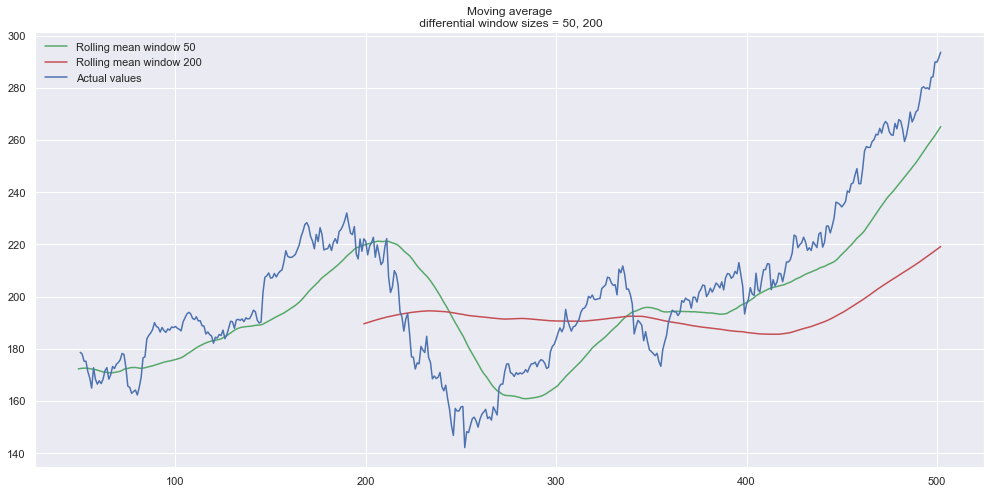

In [310]:
def plot_moving_average_differential(series, window1, window2, plot_intervals=False, scale=1.96):
    rolling_mean1 = series.rolling(window=window1).mean()
    rolling_mean2 = series.rolling(window=window2).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n differential window sizes = ' + str(window1) + ', ' + str(window2))
    plt.plot(rolling_mean1, 'g', label='Rolling mean window ' + str(window1))
    plt.plot(rolling_mean2, 'r', label='Rolling mean window ' + str(window2))

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window1:], rolling_mean[window1:])
        deviation = np.std(series[window1:] - rolling_mean[window1:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window1:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

# differential 50-200
plot_moving_average_differential(aapl['Close'], 50, 200)

A surprisingly ***good*** indicator for buying and selling **AAPL*** stock! When my 50-day rolling mean average (in green) goes below my 200-day rolling mean average (in red), I *indeed* should ***sell***. And when my 50-days crosses above, I *indeed* should ***buy***. That's what I'm going to use from now on!

<br />
<center>
<img src="ipynb.images/funny-fish.gif" width=400 />
    The End
</center>